# Business Case

In today's competitive automotive market, accurate car price prediction is crucial for businesses to make informed decisions and optimize their operations. By understanding the factors that influence car prices, businesses can:

Improve pricing strategies: Set competitive prices that maximize profitability while attracting customers.  
Enhance inventory management: Optimize inventory levels based on demand forecasts and price sensitivity.  
Optimize marketing efforts: Target the right customers with personalized offers and promotions.  
Inform product development: Identify the features and specifications that customers value most and incorporate them into new models.  
Assess insurance risk: Evaluate the insurance risk associated with different car models and adjust premiums accordingly.  

The Role of Data Analysis  
Accurate car price prediction requires a comprehensive analysis of various factors that influence pricing. The provided dataset, which includes information about car specifications, insurance risk ratings, and normalized losses, offers a valuable resource for such analysis.

By leveraging machine learning techniques and data analysis tools, businesses can extract valuable insights from this data and build predictive models that accurately estimate car prices.

These models can be used to:  
Identify key determinants of price: Determine which car attributes have the most significant impact on pricing.
Quantify the influence of different factors: Measure the relative importance of factors such as engine size, fuel efficiency, and safety features.
Predict future price trends: Forecast how prices might change over time based on market dynamics and economic conditions.


Accurate car price prediction is essential for businesses to succeed in the competitive automotive market. By leveraging data analysis and machine learning techniques, businesses can gain a deeper understanding of the factors that influence pricing, optimize their operations, and make informed decisions.

# Domain Anaysis

To effectively analyze car price data and build accurate prediction models, it's essential to have a strong understanding of the automotive industry and its key factors:  

Market Dynamics:   
The automotive market is influenced by various factors, including economic conditions, consumer preferences, technological advancements, and government regulations.     
Car Specifications:  
The price of a car is determined by a multitude of specifications, such as engine size, fuel efficiency, safety features, interior and exterior features, and brand reputation.  
Insurance Risk:   
Insurance companies assess the risk associated with different car models and adjust premiums accordingly. Factors like safety ratings, theft rates, and repair costs influence insurance premiums.  
Supply and Demand:  
The balance between supply and demand in the automotive market can significantly impact car prices. Economic conditions, production capacity, and consumer preferences play a role in determining supply and demand.  

Domain-Specific Considerations: 

Brand Value:  
Established brands often command higher prices compared to newer or less well-known brands.
Luxury vs. Economy:  
Cars positioned in the luxury segment typically have higher prices compared to economy cars due to premium features and materials.
Technological Advancements:  
New technologies, such as electric vehicles and autonomous driving, can influence car prices.
Government Regulations:   
Fuel efficiency standards, emissions regulations, and import tariffs can impact car prices.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('auto_imports.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Basic Checks

In [5]:
# For better understanding of columns , rename the columns

In [6]:
df=df.rename(columns={'3':'symboling', '?':'losses', 'alfa-romero':'make', 'gas':'fuel_type', 'std':'aspiration', 'two':'no_of_doors', 
                      'convertible':'body_style', 'rwd':'drive_wheels','front':'engine_location', '88.60':'wheel_base', '168.80':'length',
                      '64.10':'width', '48.80':'height', '2548':'weight', 'dohc':'engine_type', 'four':'no_of_cylinders',
                      '130':'engine_size', 'mpfi':'fuel_system', '3.47':'bore', '2.68':'stroke', '9.00':'compression_ratio',
                      '111':'hp', '5000':'rpm', '21':'city_mileage', '27':'highway_mileage', '13495':'price'})

In [7]:
df

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   losses             200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   no_of_doors        200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  weight             200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  no_of_cylinders    200 non-null    object 
 16  engine_size        200 non

In [9]:
df.describe()

,symboling,wheel_base,length,width,height,weight,engine_size,compression_ratio,city_mileage,highway_mileage,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [10]:
df.describe(include='O')

,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,engine_type,no_of_cylinders,fuel_system,bore,stroke,hp,rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


In [11]:
# Categorical data 
df_cat=(df[['symboling' , 'make' , 'fuel_type' ,'aspiration' ,'no_of_doors' ,'body_style' , 'drive_wheels' ,'engine_location' ,
         'engine_type' ,'no_of_cylinders' ,'fuel_system']])


In [12]:
# Continuous data
df_num=(df[['losses' , 'wheel_base' , 'length' ,'width'	,'height' ,'weight' ,'engine_size' ,'bore' ,'stroke' ,'compression_ratio' ,
        'hp' , 'rpm' , 'city_mileage' ,  'highway_mileage' , 'price']])

In [13]:
df_cat

,symboling,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,engine_type,no_of_cylinders,fuel_system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
195,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [14]:
df_num

,losses,wheel_base,length,width,height,weight,engine_size,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [15]:
df.head()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### Handling Corrupted value 
##### before any steps handel '?' value

In [16]:
# checking for every column if it has '?' value 
for col in df_num.columns:
    missing_values = df_num[col] == '?'
    if missing_values.any():
        print(col)
print('This above columns has ? values')

losses
bore
stroke
hp
rpm
This above columns has ? values


In [17]:
# Replacing the '?' with null 
df.loc[df.losses == '?' ,'losses'] = np.nan
df.loc[df.bore == '?' ,'bore'] = np.nan
df.loc[df.stroke == '?' ,'stroke'] = np.nan 
df.loc[df.hp == '?' ,'hp'] = np.nan
df.loc[df.rpm == '?' ,'rpm'] = np.nan

In [18]:
df.head()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# EDA

### Univarite Analysis 
#### For Continious Data

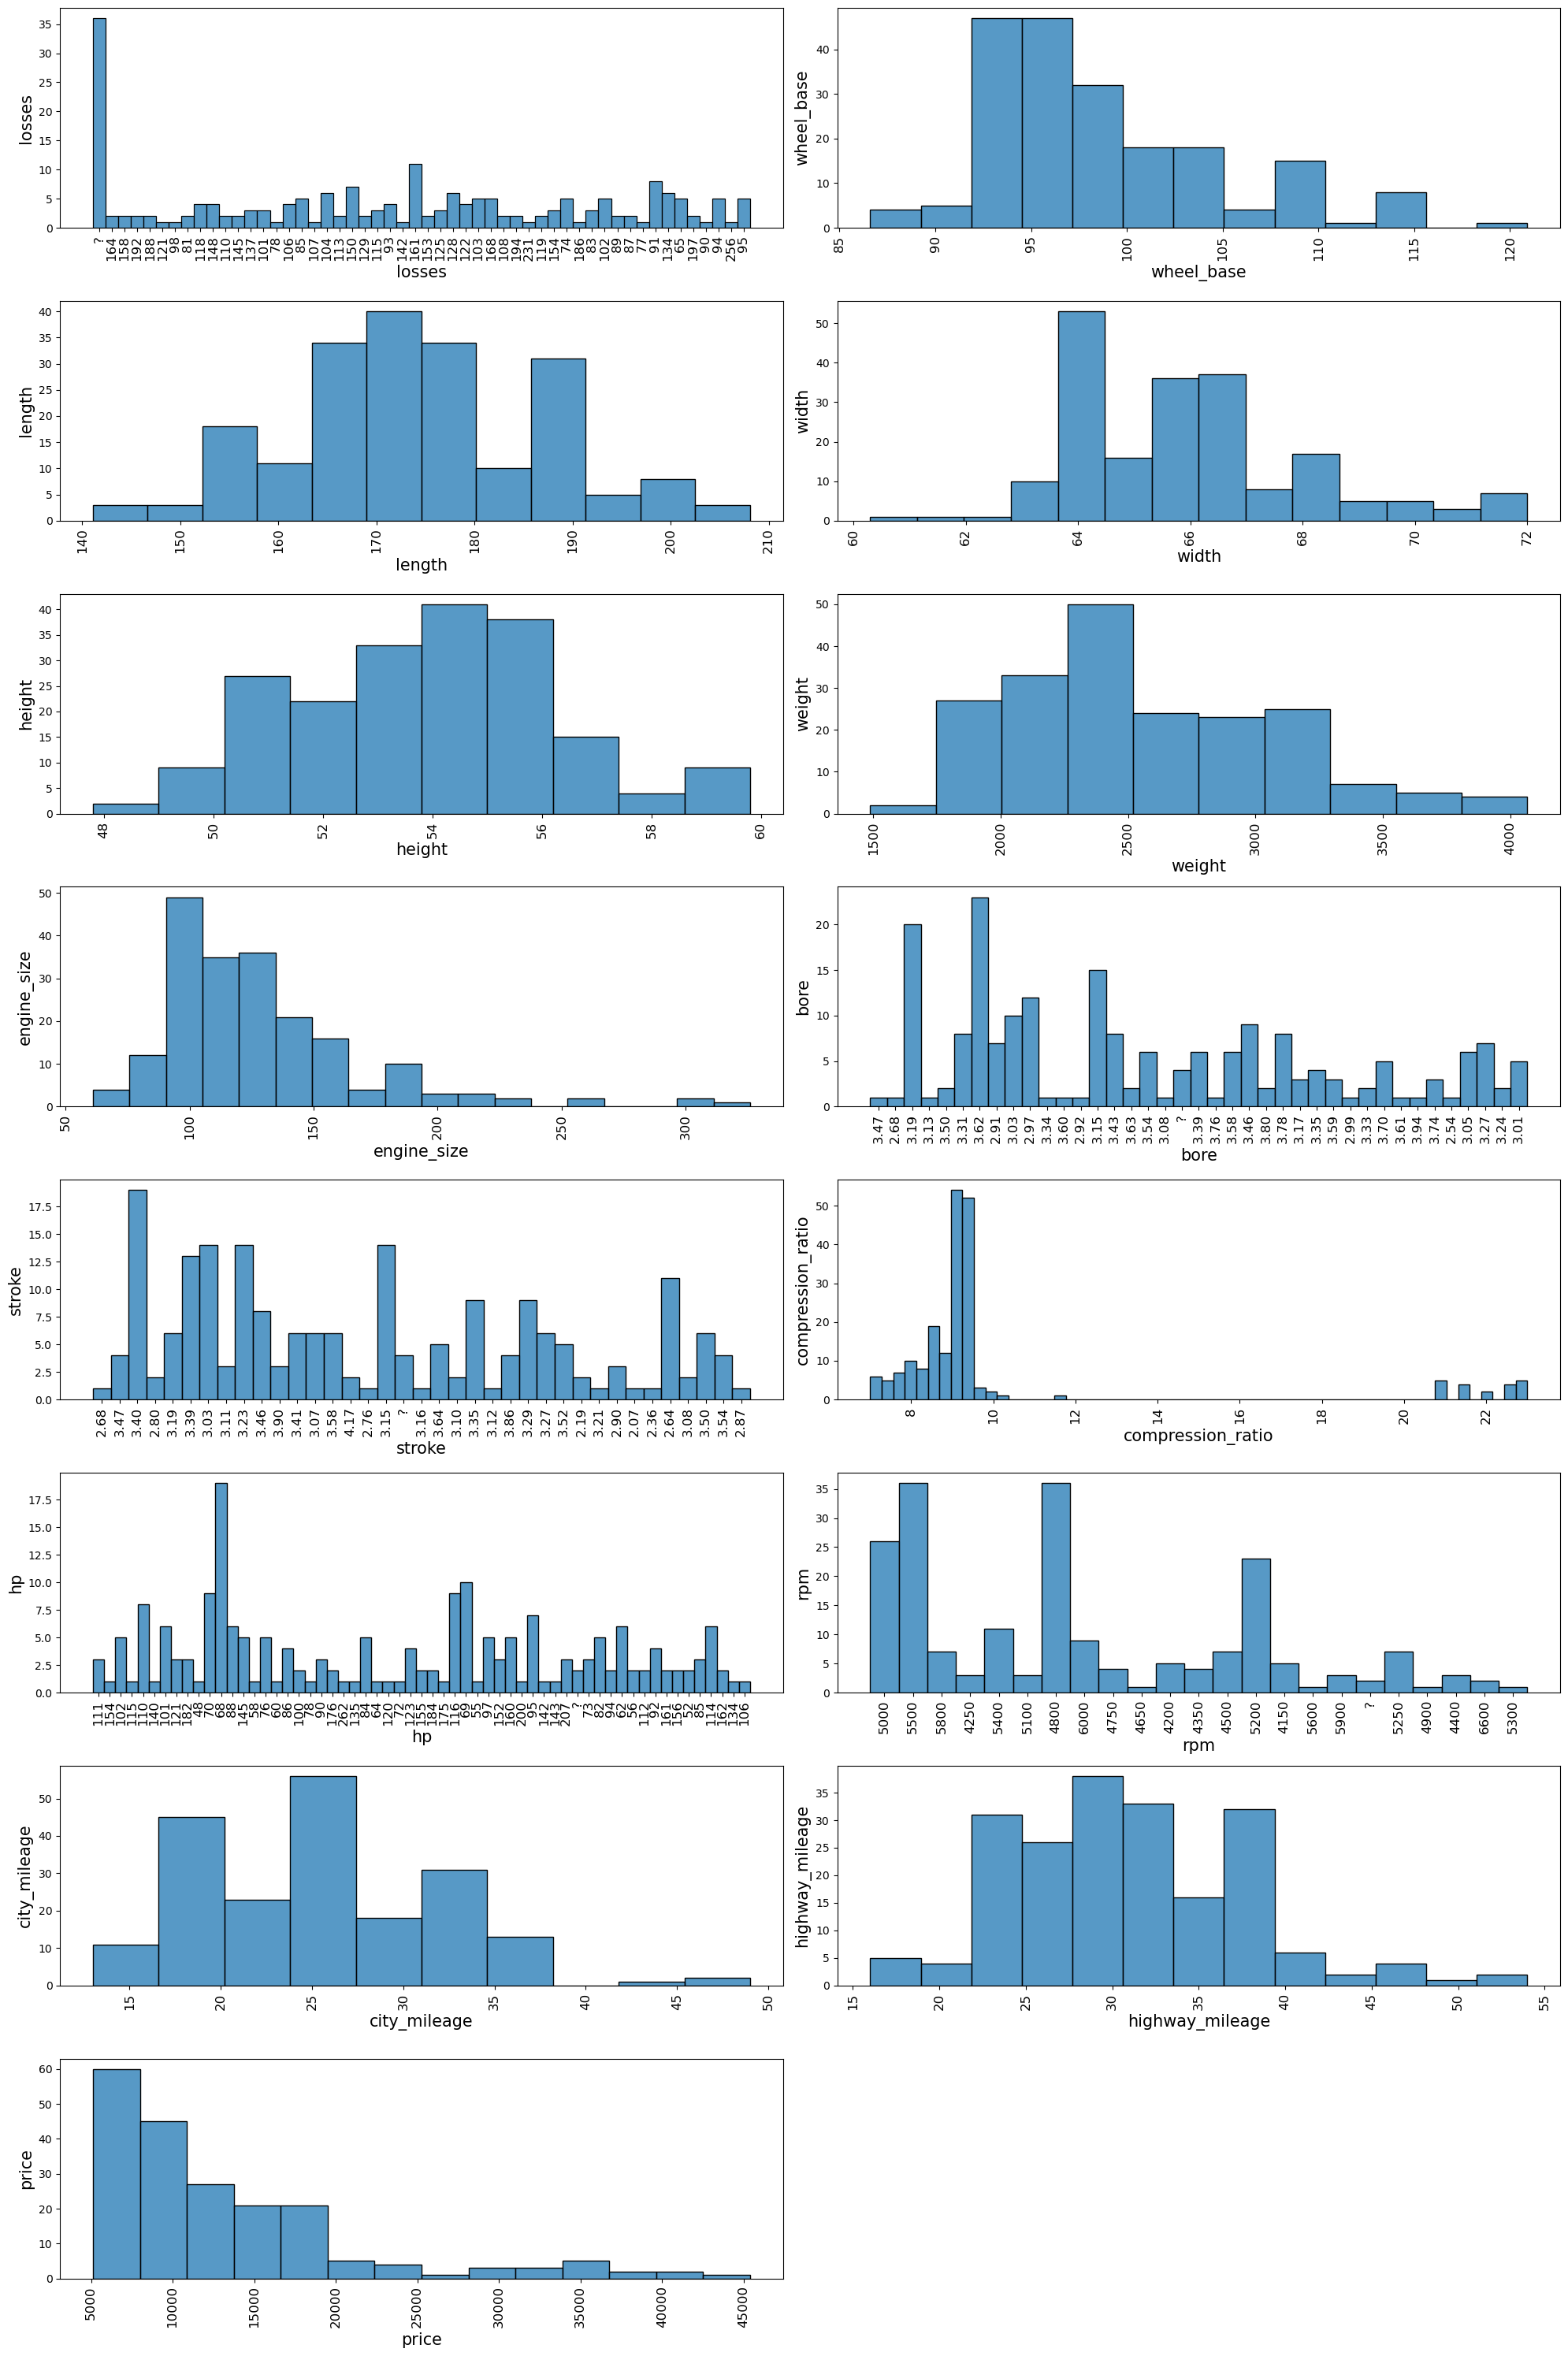

In [19]:
plt.figure(figsize=(20,30))
plotnumber=1
for i in df_num:
    plt.subplot(8,2,plotnumber)
    sns.histplot(x=df_num[i])
    plt.xticks(rotation=90,fontsize=12)
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
    plotnumber=plotnumber+1
    plt.tight_layout()

### Insights

#### losses:
The distribution is slightly skewed to the right, indicating a concentration of lower loss values.
There are a few outliers on the higher end of the distribution.
The most frequent loss value appears to be around 110.

#### wheel base:
The distribution is slightly skewed to the left, indicating a concentration of higher wheelbase values.
There is a clear outlier on the lower end of the distribution.
The most frequent wheelbase value appears to be around 100.

#### length:
The distribution is slightly skewed to the right, indicating a concentration of lower length values.
There are a few outliers on the higher end of the distribution.
The most frequent length value appears to be around 170.

#### width:
The distribution is relatively symmetric, with a slight skew to the right.
There are a few outliers on the higher end of the distribution.
The most frequent width value appears to be around 65.

#### height:
The distribution is slightly skewed to the left, indicating a concentration of higher height values.
There are a few outliers on the lower end of the distribution.
The most frequent height value appears to be around 55.

#### weight:
The distribution is skewed to the right, indicating a concentration of lower weight values.
There are a few outliers on the higher end of the distribution.
The most frequent weight value appears to be around 3000.

#### engine-size:
The distribution is skewed to the right, indicating a concentration of lower engine size values.
There are a few outliers on the higher end of the distribution.
The most frequent engine size value appears to be around 100.

#### bore:
The distribution is relatively symmetric, with a slight skew to the right.
There are a few outliers on the higher end of the distribution.
The most frequent bore value appears to be around 3.5.

#### stroke:
The distribution is slightly skewed to the right, indicating a concentration of lower stroke values.
There are a few outliers on the higher end of the distribution.
The most frequent stroke value appears to be around 3.0.

#### compression-ratio:
The distribution is skewed to the left, indicating a concentration of higher compression ratio values.
There is a clear outlier on the lower end of the distribution.
The most frequent compression ratio value appears to be around 10.

#### hp:
The distribution is skewed to the right, indicating a concentration of lower horsepower values.
There are a few outliers on the higher end of the distribution.
The most frequent horsepower value appears to be around 100.

#### rpm:
The distribution is relatively symmetric, with a slight skew to the right.
There are a few outliers on the higher end of the distribution.
The most frequent rpm value appears to be around 5000.

#### city_mileage:

The distribution is slightly skewed to the right, indicating a concentration of lower city mileage values.
There are a few outliers on the higher end of the distribution.
The most frequent city mileage value appears to be around 20.

#### highway_mileage:
The distribution is slightly skewed to the right, indicating a concentration of lower highway mileage values.
There are a few outliers on the higher end of the distribution.
The most frequent highway mileage value appears to be around 25.

#### price:
The distribution is skewed to the right, indicating a concentration of lower price values.
There are a few outliers on the higher end of the distribution.
The most frequent price value appears to be around 10,000.

#### rpm:
The distribution is relatively symmetric, with a slight skew to the right.
There are a few outliers on the higher end of the distribution.
The most frequent rpm value appears to be around 5000.

#### city_mileage : 
The distribution is slightly skewed to the right, indicating a concentration of lower city mileage values.
The most frequent city mileage value appears to be around 20.

#### highway_mileage :
The distribution is slightly skewed to the right, indicating a concentration of lower highway mileage values.
The most frequent highway mileage value appears to be around 25.

#### price:
The distribution is skewed to the right, indicating a concentration of lower price values.
There are a few outliers on the higher end of the distribution.
The most frequent price value appears to be around 10,000.

### Univarite Analysis 
#### For Categorical Data

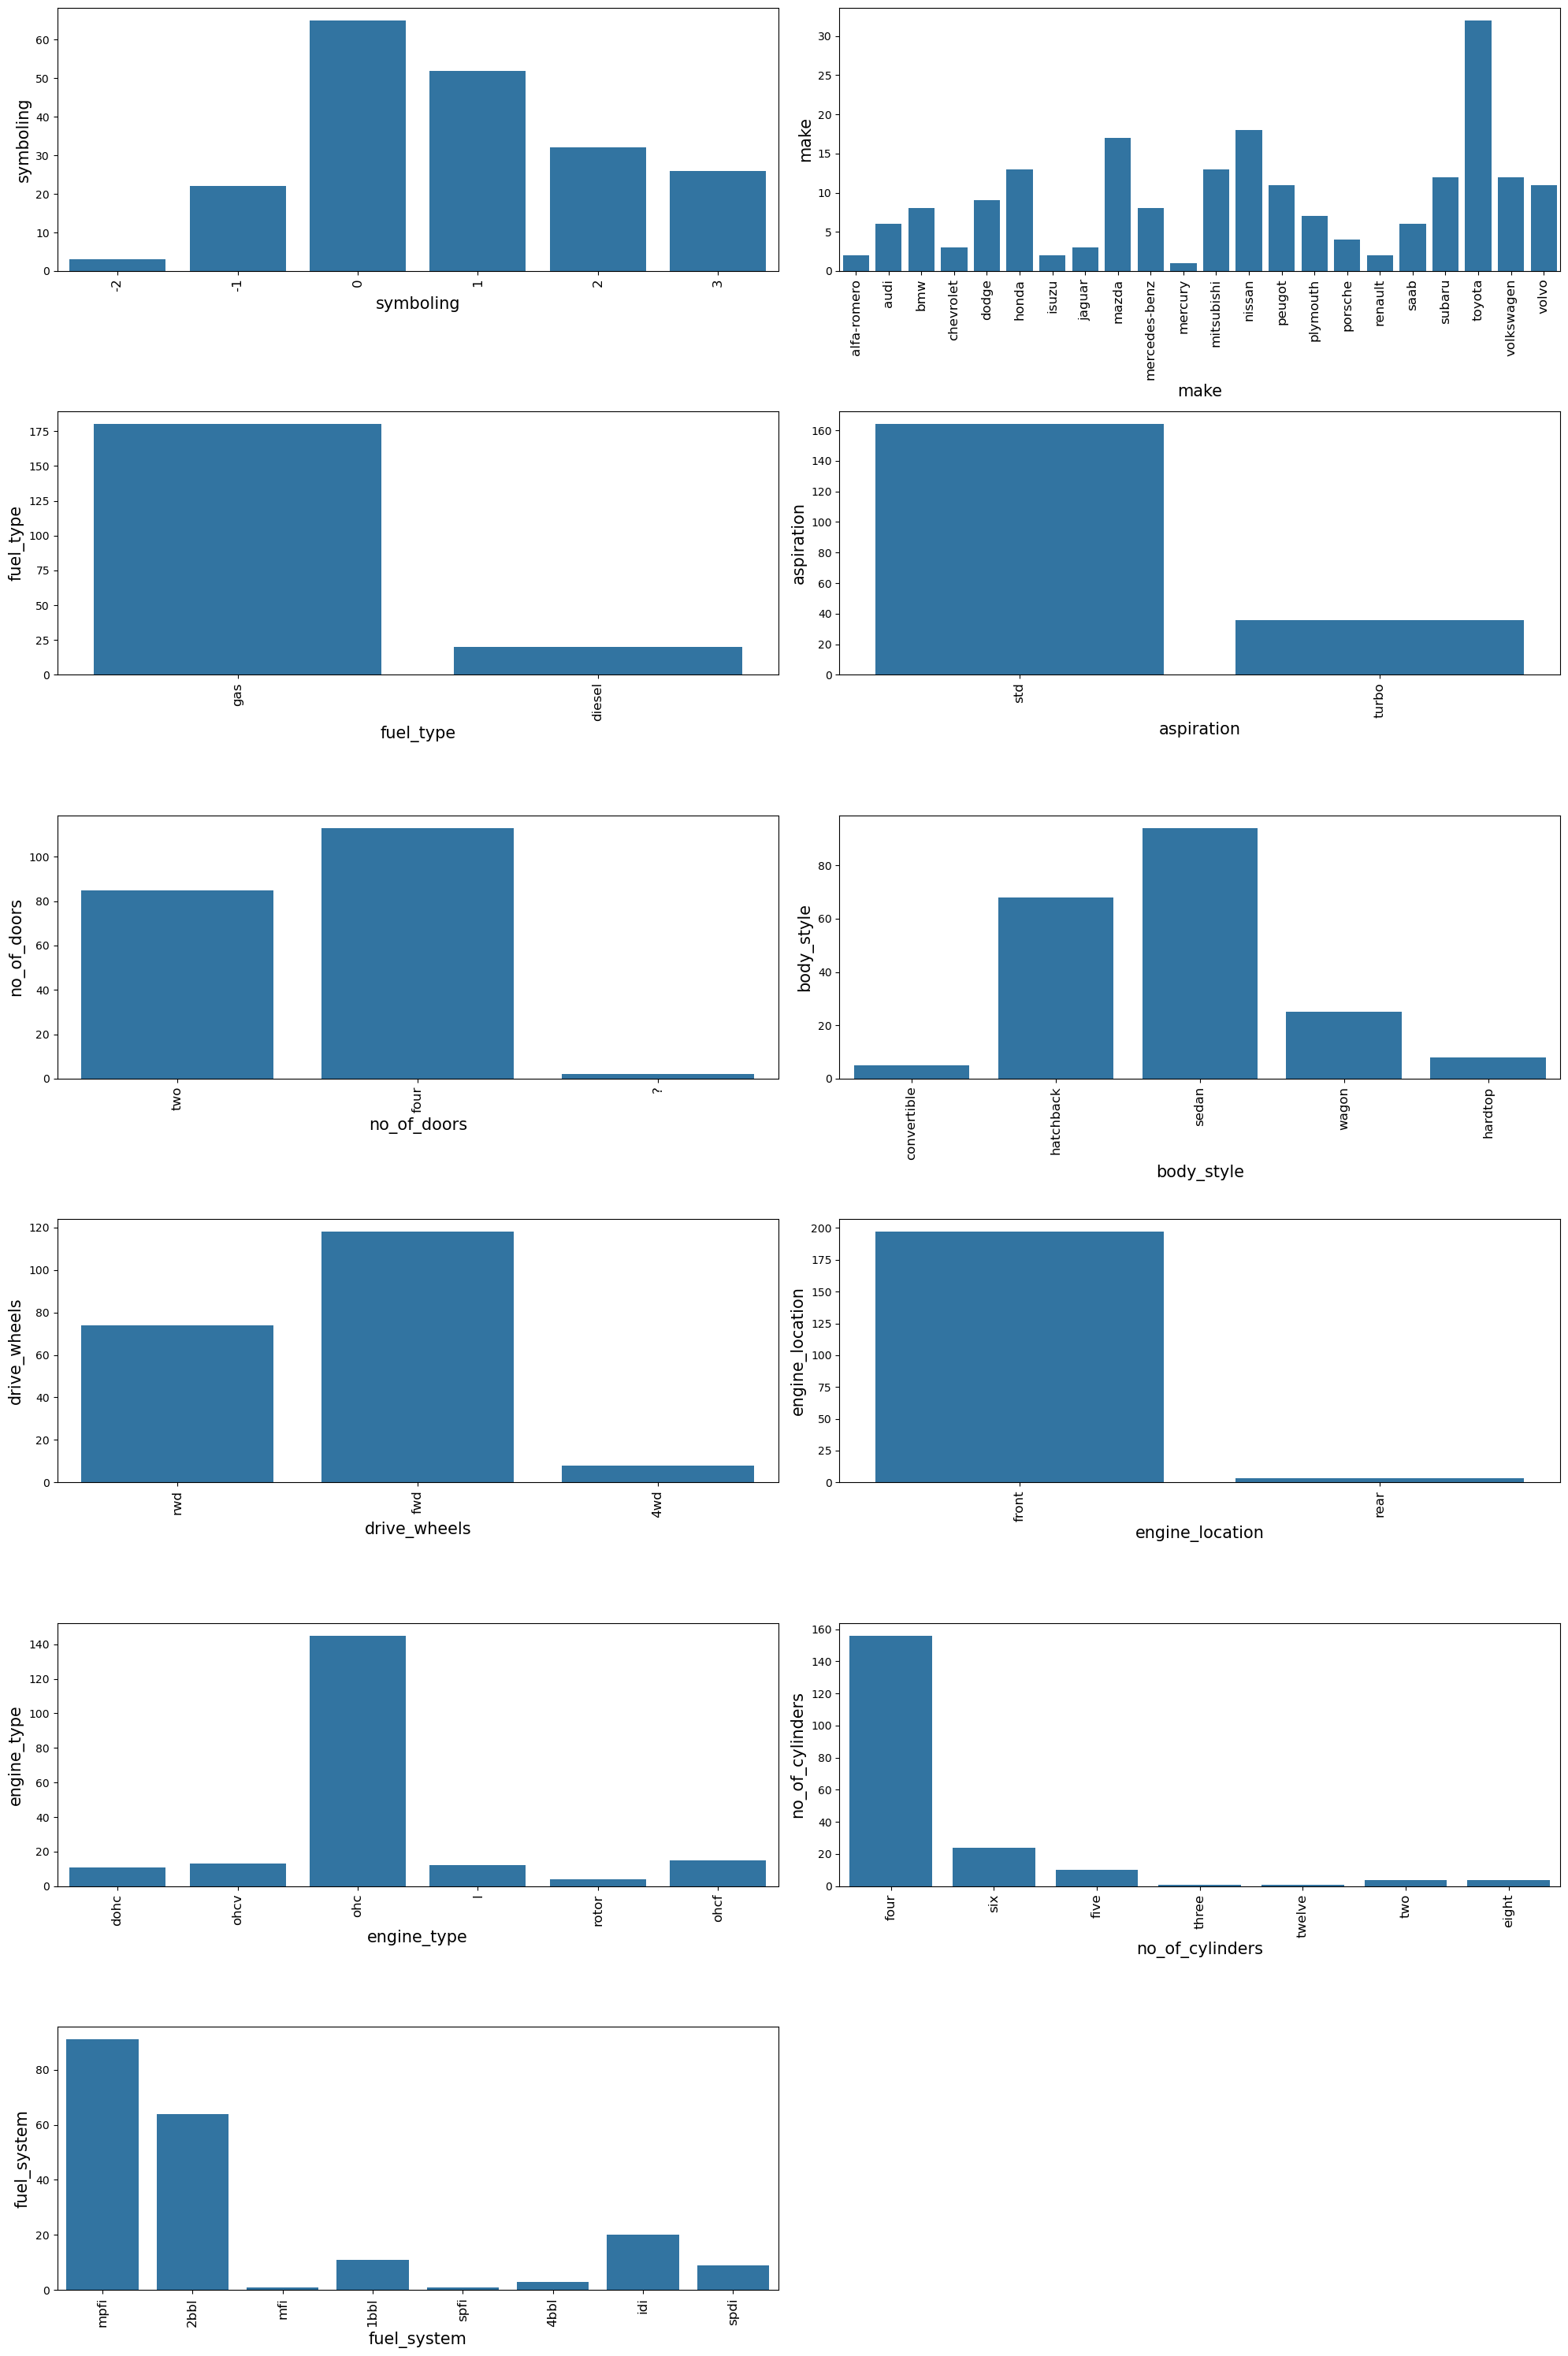

In [20]:
plt.figure(figsize=(20,30))
plotnumber=1
for i in df_cat:
    plt.subplot(6,2,plotnumber)
    sns.countplot(x=df_cat[i])
    plt.xticks(rotation=90,fontsize=12)
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
    plotnumber=plotnumber+1
    plt.tight_layout()

## Insights 

#### symboiling: 
The distribution might reveal whether cars tend to be more or less risky, as indicated by the symboling values. A skewed distribution towards positive or negative values could suggest a preference for certain risk levels.

#### Make :
The frequency of different car makes can indicate which brands are more or less common in the dataset. A high number of unique makes suggests a diverse dataset, while a few dominant makes might indicate a focus on specific brands.

#### fuel_type: 
 The proportion of gas and diesel vehicles can provide insights into the popularity of different fuel types.If one fuel type significantly outnumbers the other, it suggests a market preference.

#### aspiration:
 The relative frequencies of "std" and "turbo" can indicate the popularity of naturally aspirated versus turbocharged engines. Any trends in the prevalence of aspiration types over time or across different car segments might be interesting to explore.

#### no_of_doors:
Four-door cars seem to be the most common, significantly outnumbering two-door cars.

#### body_style:
 Sedans are the most common body style, followed by hatchbacks and wagons. The dataset includes a variety of body styles, indicating a diverse range of car types.

#### drive_wheels: 
Front-wheel drive (FWD) is the most common drive configuration. While FWD is dominant, there are also a significant number of rear-wheel drive (RWD) cars.

#### engine_location: 
Front-engine placement is overwhelmingly preferred, with very few rear-engine cars.

#### engine_type:
The "ohc" engine type is significantly more prevalent than others, suggesting it's the most common type in the dataset. While "ohc" is dominant, there's a reasonable variety of other engine types present.

#### no_of_cylinder:
Four-cylinder engines are the most common, followed by six-cylinder engines. The distribution is slightly skewed towards the lower number of cylinders, indicating a preference for smaller engines.

#### fuel_system:
 The "mpfi" fuel system is the most common, suggesting it's the preferred choice among car manufacturers. There's a moderate level of diversity in fuel systems, with several other types being used.

### Bivarite Analysis 
#### For Continious Data

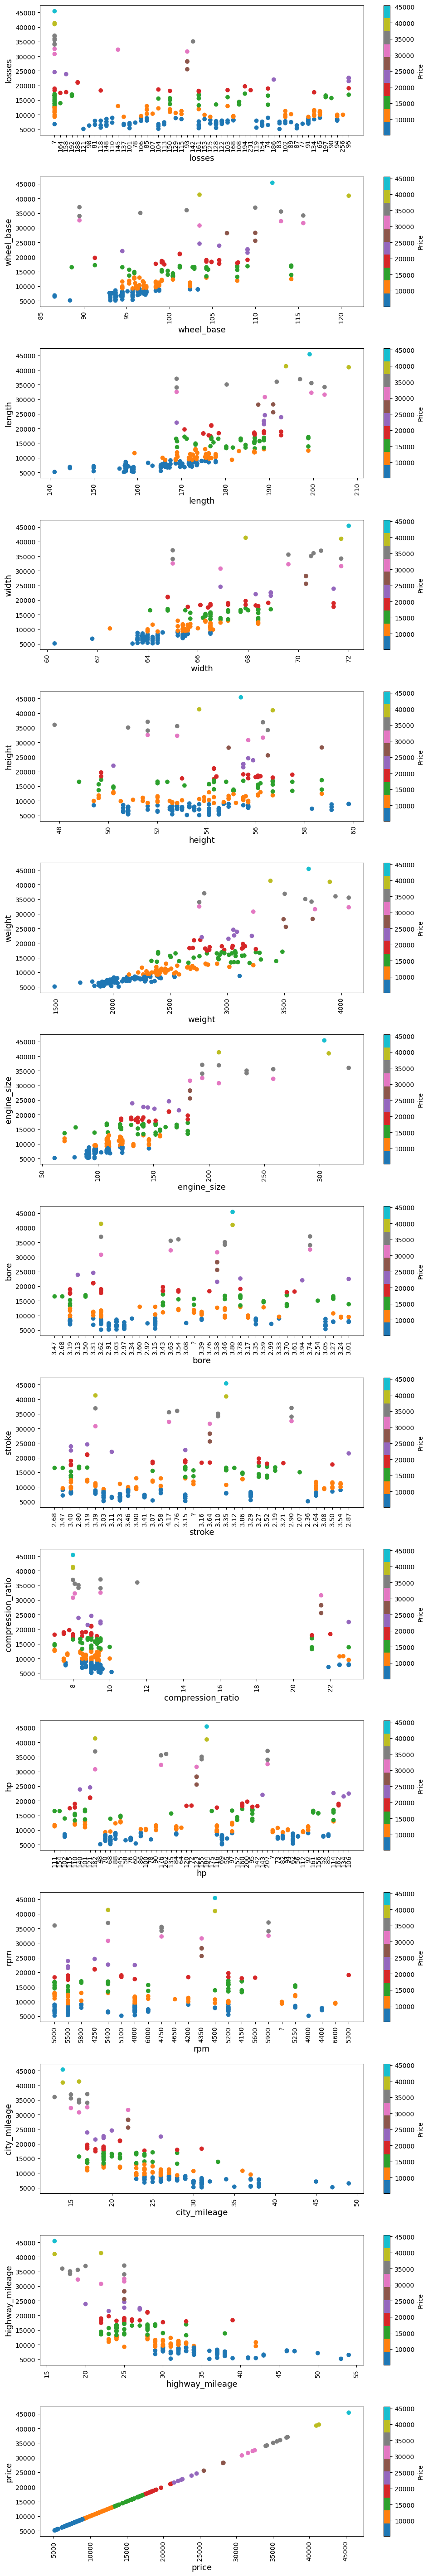

In [21]:
plt.figure(figsize=(10,60))
plotnumber=1
for i in df_num:
    plt.subplot(16,1,plotnumber)
    plt.scatter(df_num[i],df.price,c=df.price, cmap="tab10")
    plt.xticks(rotation=90,fontsize=10)
    plt.colorbar(label="Price")
    plt.xlabel(i,fontsize=13)
    plt.ylabel(i,fontsize=13)
    plotnumber=plotnumber+1
    plt.tight_layout()

### Insights :

#### losses :  
There seems to be a weak negative correlation between losses and price. This suggests that cars with higher losses might tend to have lower prices. However, the relationship is not very strong, and there is a significant amount of scatter.
The different colors representing make indicate that there might be some variation in the relationship between losses and price across different car makes. Further analysis would be needed to quantify this effect.  

#### wheel_base :
There seems to be a moderate positive correlation between wheel_base and price. This suggests that cars with longer wheelbases tend to have higher prices.  
The different colors representing make suggest that the relationship between wheel_base and price might vary across different car makes. Further analysis would be needed to quantify this effect.  

#### length :
There seems to be a moderate positive correlation between length and price. This suggests that longer cars tend to have higher prices.
The different colors representing make indicate that the relationship between length and price might vary across different car makes. Further analysis would be needed to quantify this effect.

#### width :
There seems to be a moderate positive correlation between width and price, although it's slightly weaker than the correlation between length and price.
The different colors representing make suggest that the relationship between width and price might also vary across different car makes.

#### height :
 There seems to be a weak positive correlation between height and price. This suggests that taller cars might tend to have slightly higher prices, but the relationship is not very strong.
The different colors representing make indicate that the relationship between height and price might vary across different car makes. Further analysis would be needed to quantify this effect.

#### weight :
There seems to be a stronger positive correlation between weight and price. This suggests that heavier cars tend to have higher prices.
The different colors representing make suggest that the relationship between weight and price might also vary across different car makes.

#### engine_size : 
There seems to be a strong positive correlation between engine_size and price. This suggests that cars with larger engines tend to have higher prices.
 The different colors representing make indicate that the relationship between engine_size and price might vary across different car makes. Further analysis would be needed to quantify this effect.

#### bore :
There seems to be a moderate positive correlation between bore and price. This suggests that cars with larger bores (cylinder diameters) tend to have higher prices.
The different colors representing make suggest that the relationship between bore and price might also vary across different car makes.

#### stroke :
There seems to be a weak positive correlation between stroke and price. This suggests that cars with longer strokes might tend to have slightly higher prices, but the relationship is not very strong.
The different colors representing make indicate that the relationship between stroke and price might vary across different car makes. Further analysis would be needed to quantify this effect.

#### compression_ratio :
There seems to be a weak negative correlation between compression_ratio and price. This suggests that cars with higher compression ratios might tend to have slightly lower prices, but the relationship is not very strong.
The different colors representing make suggest that the relationship between compression_ratio and price might also vary across different car makes.

#### hp :
There seems to be a strong positive correlation between hp (horsepower) and price. This suggests that cars with higher horsepower tend to have higher prices.
The different colors representing make indicate that the relationship between hp and price might vary across different car makes. Further analysis would be needed to quantify this effect.

#### rpm :
There seems to be a weak positive correlation between rpm (revolutions per minute) and price. This suggests that cars with higher rpm might tend to have slightly higher prices, but the relationship is not very strong.
The different colors representing make suggest that the relationship between rpm and price might also vary across different car makes.

#### city_mileage :
There seems to be a moderate negative correlation between city_mileage and price. This suggests that cars with higher city mileage might tend to have lower prices.
The different colors representing make indicate that the relationship between city_mileage and price might vary across different car makes. Further analysis would be needed to quantify this effect.

#### highway_mileage :
here seems to be a moderate negative correlation between highway_mileage and price. This suggests that cars with higher highway mileage might tend to have lower prices.
The different colors representing make suggest that the relationship between highway_mileage and price might also vary across different car makes.

 

### Bivarite Analysis 
#### For Categorical Data

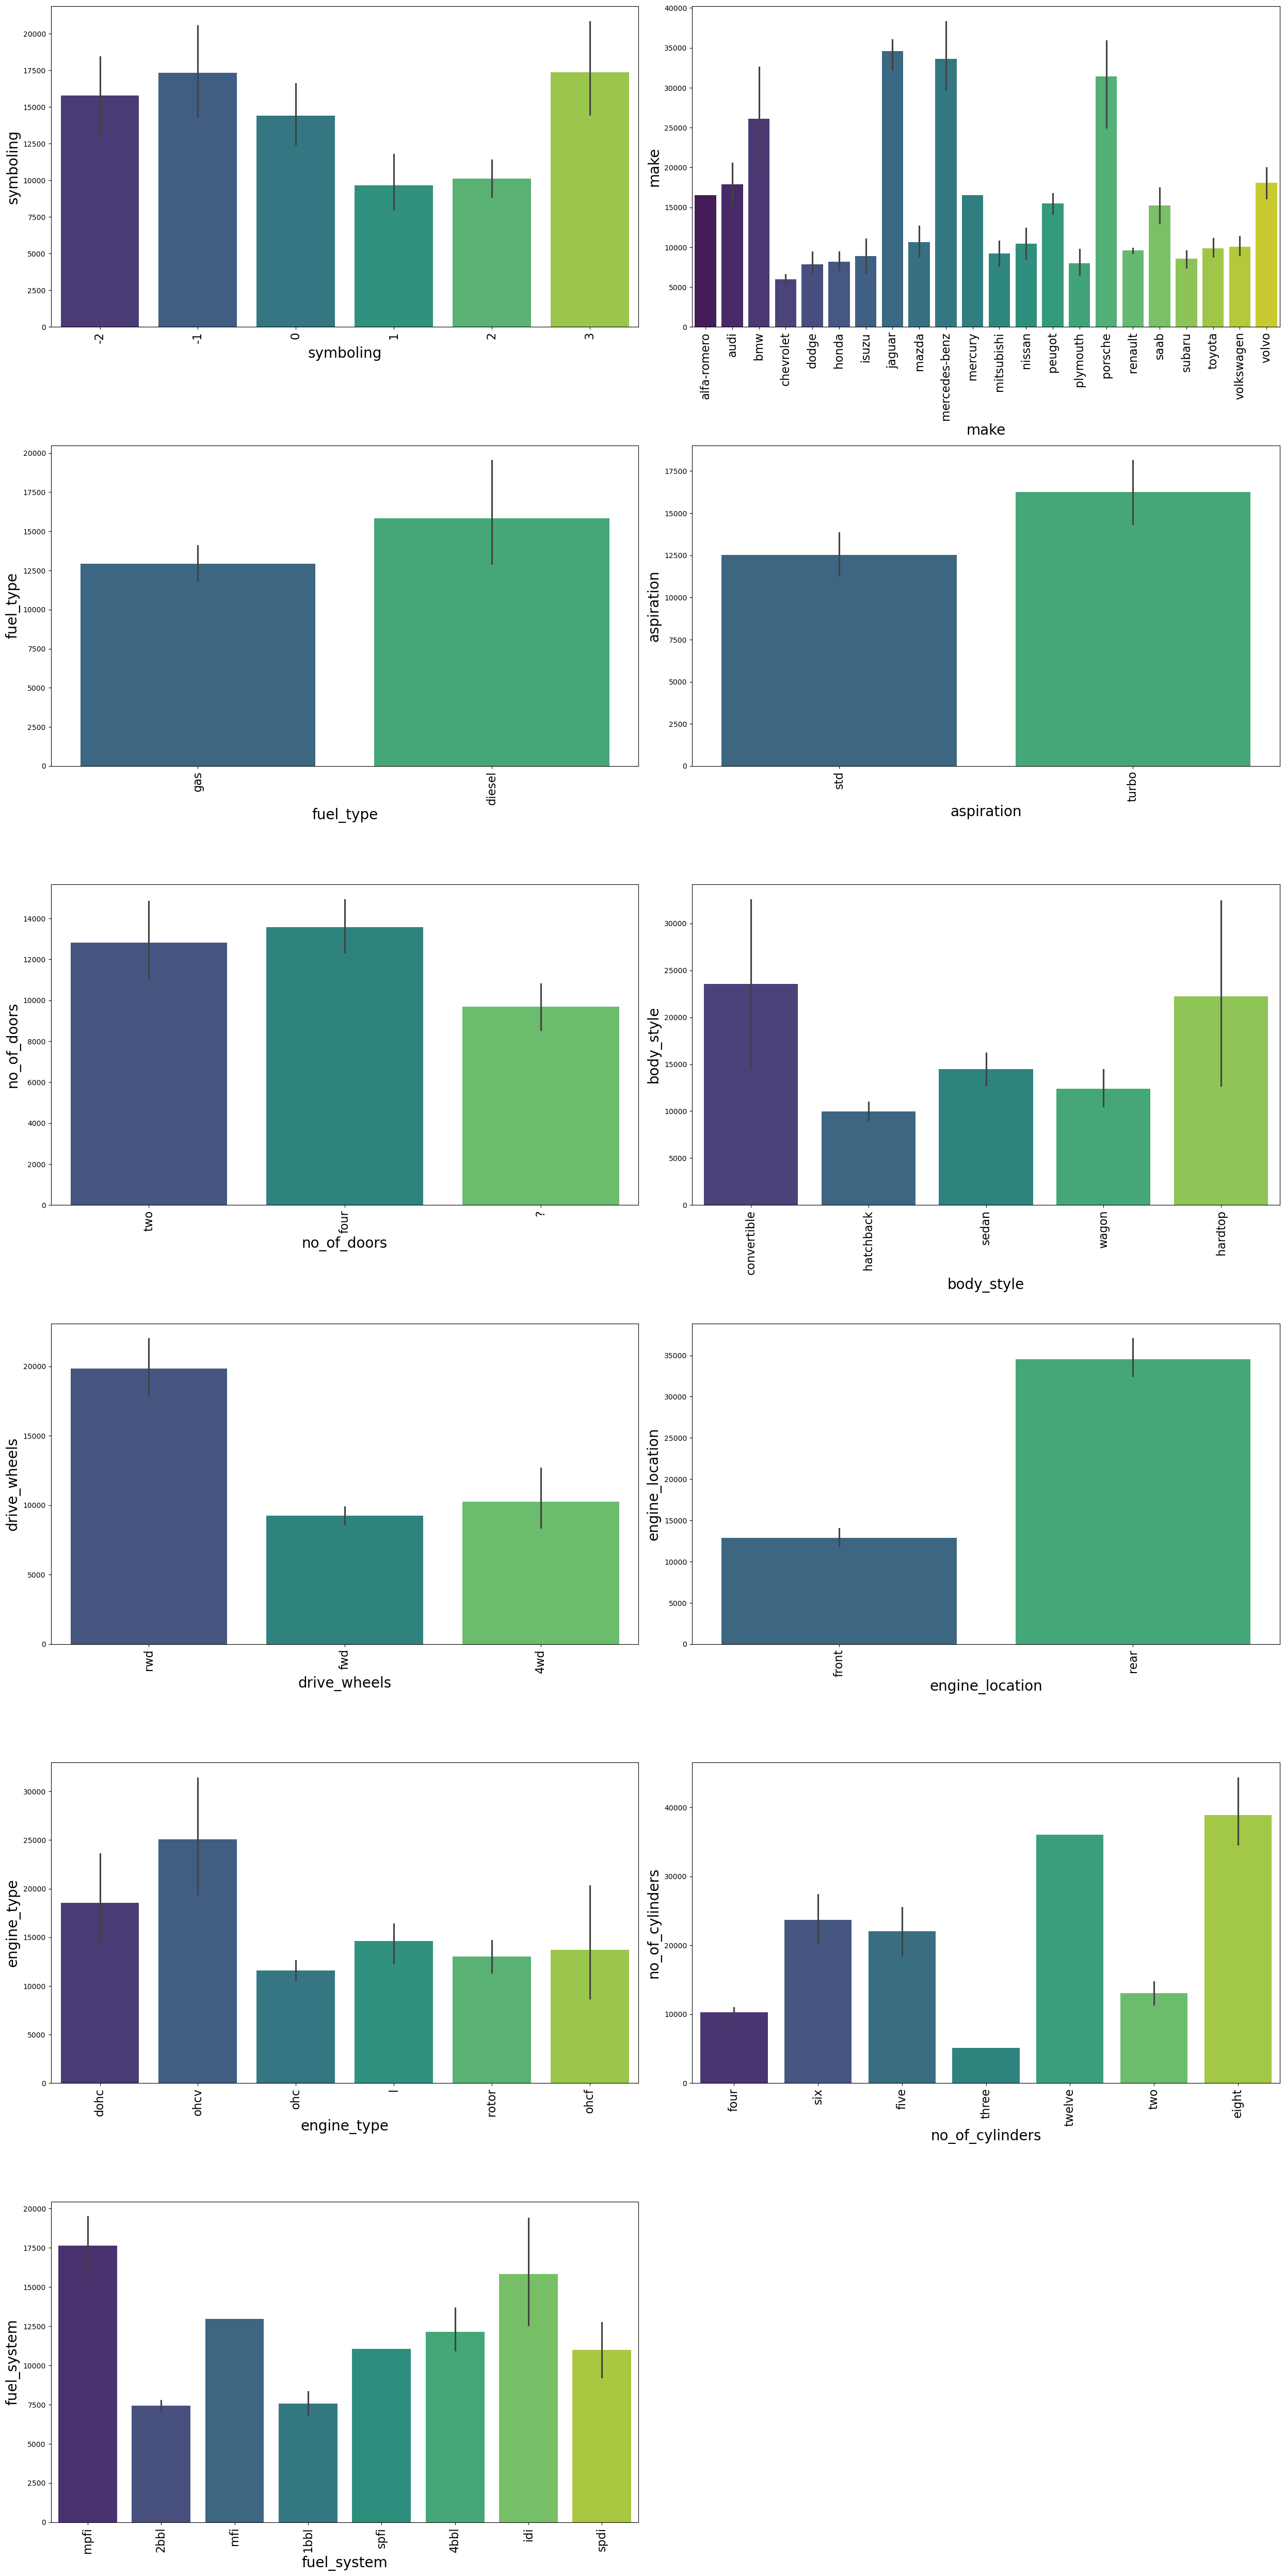

In [87]:
plt.figure(figsize=(25,50))
plotnumber=1
for i in df_cat:
    plt.subplot(6,2,plotnumber)
    sns.barplot(x=df_cat[i], y=df.price ,palette="viridis" )
    plt.xticks(rotation=90,fontsize=16)
    plt.xlabel(i,fontsize=20)
    plt.ylabel(i,fontsize=20)
    plotnumber=plotnumber+1
    plt.tight_layout()

### Insights 

#### symboling :
The bar heights appear to be relatively similar, suggesting that symboling might not have a strong influence on price. However, further analysis, such as statistical tests, would be needed to confirm this.  

#### make :
There are clear differences in the bar heights, indicating that make has a significant impact on price. Some car makes consistently have higher or lower average prices.  

#### fuel_type :
The bar heights for diesel and gas are different, suggesting that fuel_type might have an influence on price. Further analysis would be needed to quantify the effect.

#### aspiration :
The bar heights for std and turbo are different, suggesting that aspiration might have an influence on price. Further analysis would be needed to quantify the effect.

#### no_of_doors :
The bar heights appear to be relatively similar, suggesting that no_of_doors might not have a strong influence on price. However, further analysis, such as statistical tests, would be needed to confirm this.

#### body_style :
There are clear differences in the bar heights, indicating that body_style might have a significant impact on price. Some body styles tend to have higher average prices than others.

#### drive_wheels :
The bar heights for fwd and rwd are different, suggesting that drive_wheels might have an influence on price. Further analysis would be needed to quantify the effect.

#### engine_location :
The bar heights for front and rear are different, suggesting that engine_location might have an influence on price. Further analysis would be needed to quantify the effect.

#### engine_type :
There are clear differences in the bar heights, indicating that engine_type has a significant impact on price. Some engine types tend to have higher average prices than others.

#### no_of_cylinders :
There are clear differences in the bar heights, indicating that no_of_cylinders has a significant impact on price. Cars with more cylinders generally have higher prices.

#### fuel_system :
There are clear differences in the bar heights, suggesting that fuel_system has a significant impact on price. Certain fuel systems might be associated with higher-priced cars.



# Data Pre-processing 

#### Handling Null Values 

In [19]:
# checking for every column if it has '?' value 
for col in df_num.columns:
    missing_values = df_num[col] == '?'
    if missing_values.any():
        print(col)
print('This above columns has ? values')

losses
bore
stroke
hp
rpm
This above columns has ? values


In [23]:
df.isnull().sum()

symboling             0
losses               36
make                  0
fuel_type             0
aspiration            0
no_of_doors           0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
weight                0
engine_type           0
no_of_cylinders       0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
hp                    2
rpm                   2
city_mileage          0
highway_mileage       0
price                 0
dtype: int64

In [28]:
column_to_inpute = ['losses', 'bore', 'stroke', 'hp', 'rpm']

for col in column_to_inpute:
    # Replace '?' with NaN
    df[col] = df[col].replace('?', np.nan)

    # Calculate median
    median_value = df[col].median()

    # Fill missing values with median
    df[col] = df[col].fillna(median_value)

In [29]:
df.isnull().sum()

symboling            0
losses               0
make                 0
fuel_type            0
aspiration           0
no_of_doors          0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
weight               0
engine_type          0
no_of_cylinders      0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
hp                   0
rpm                  0
city_mileage         0
highway_mileage      0
price                0
dtype: int64

In [30]:
df

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Handling outliers

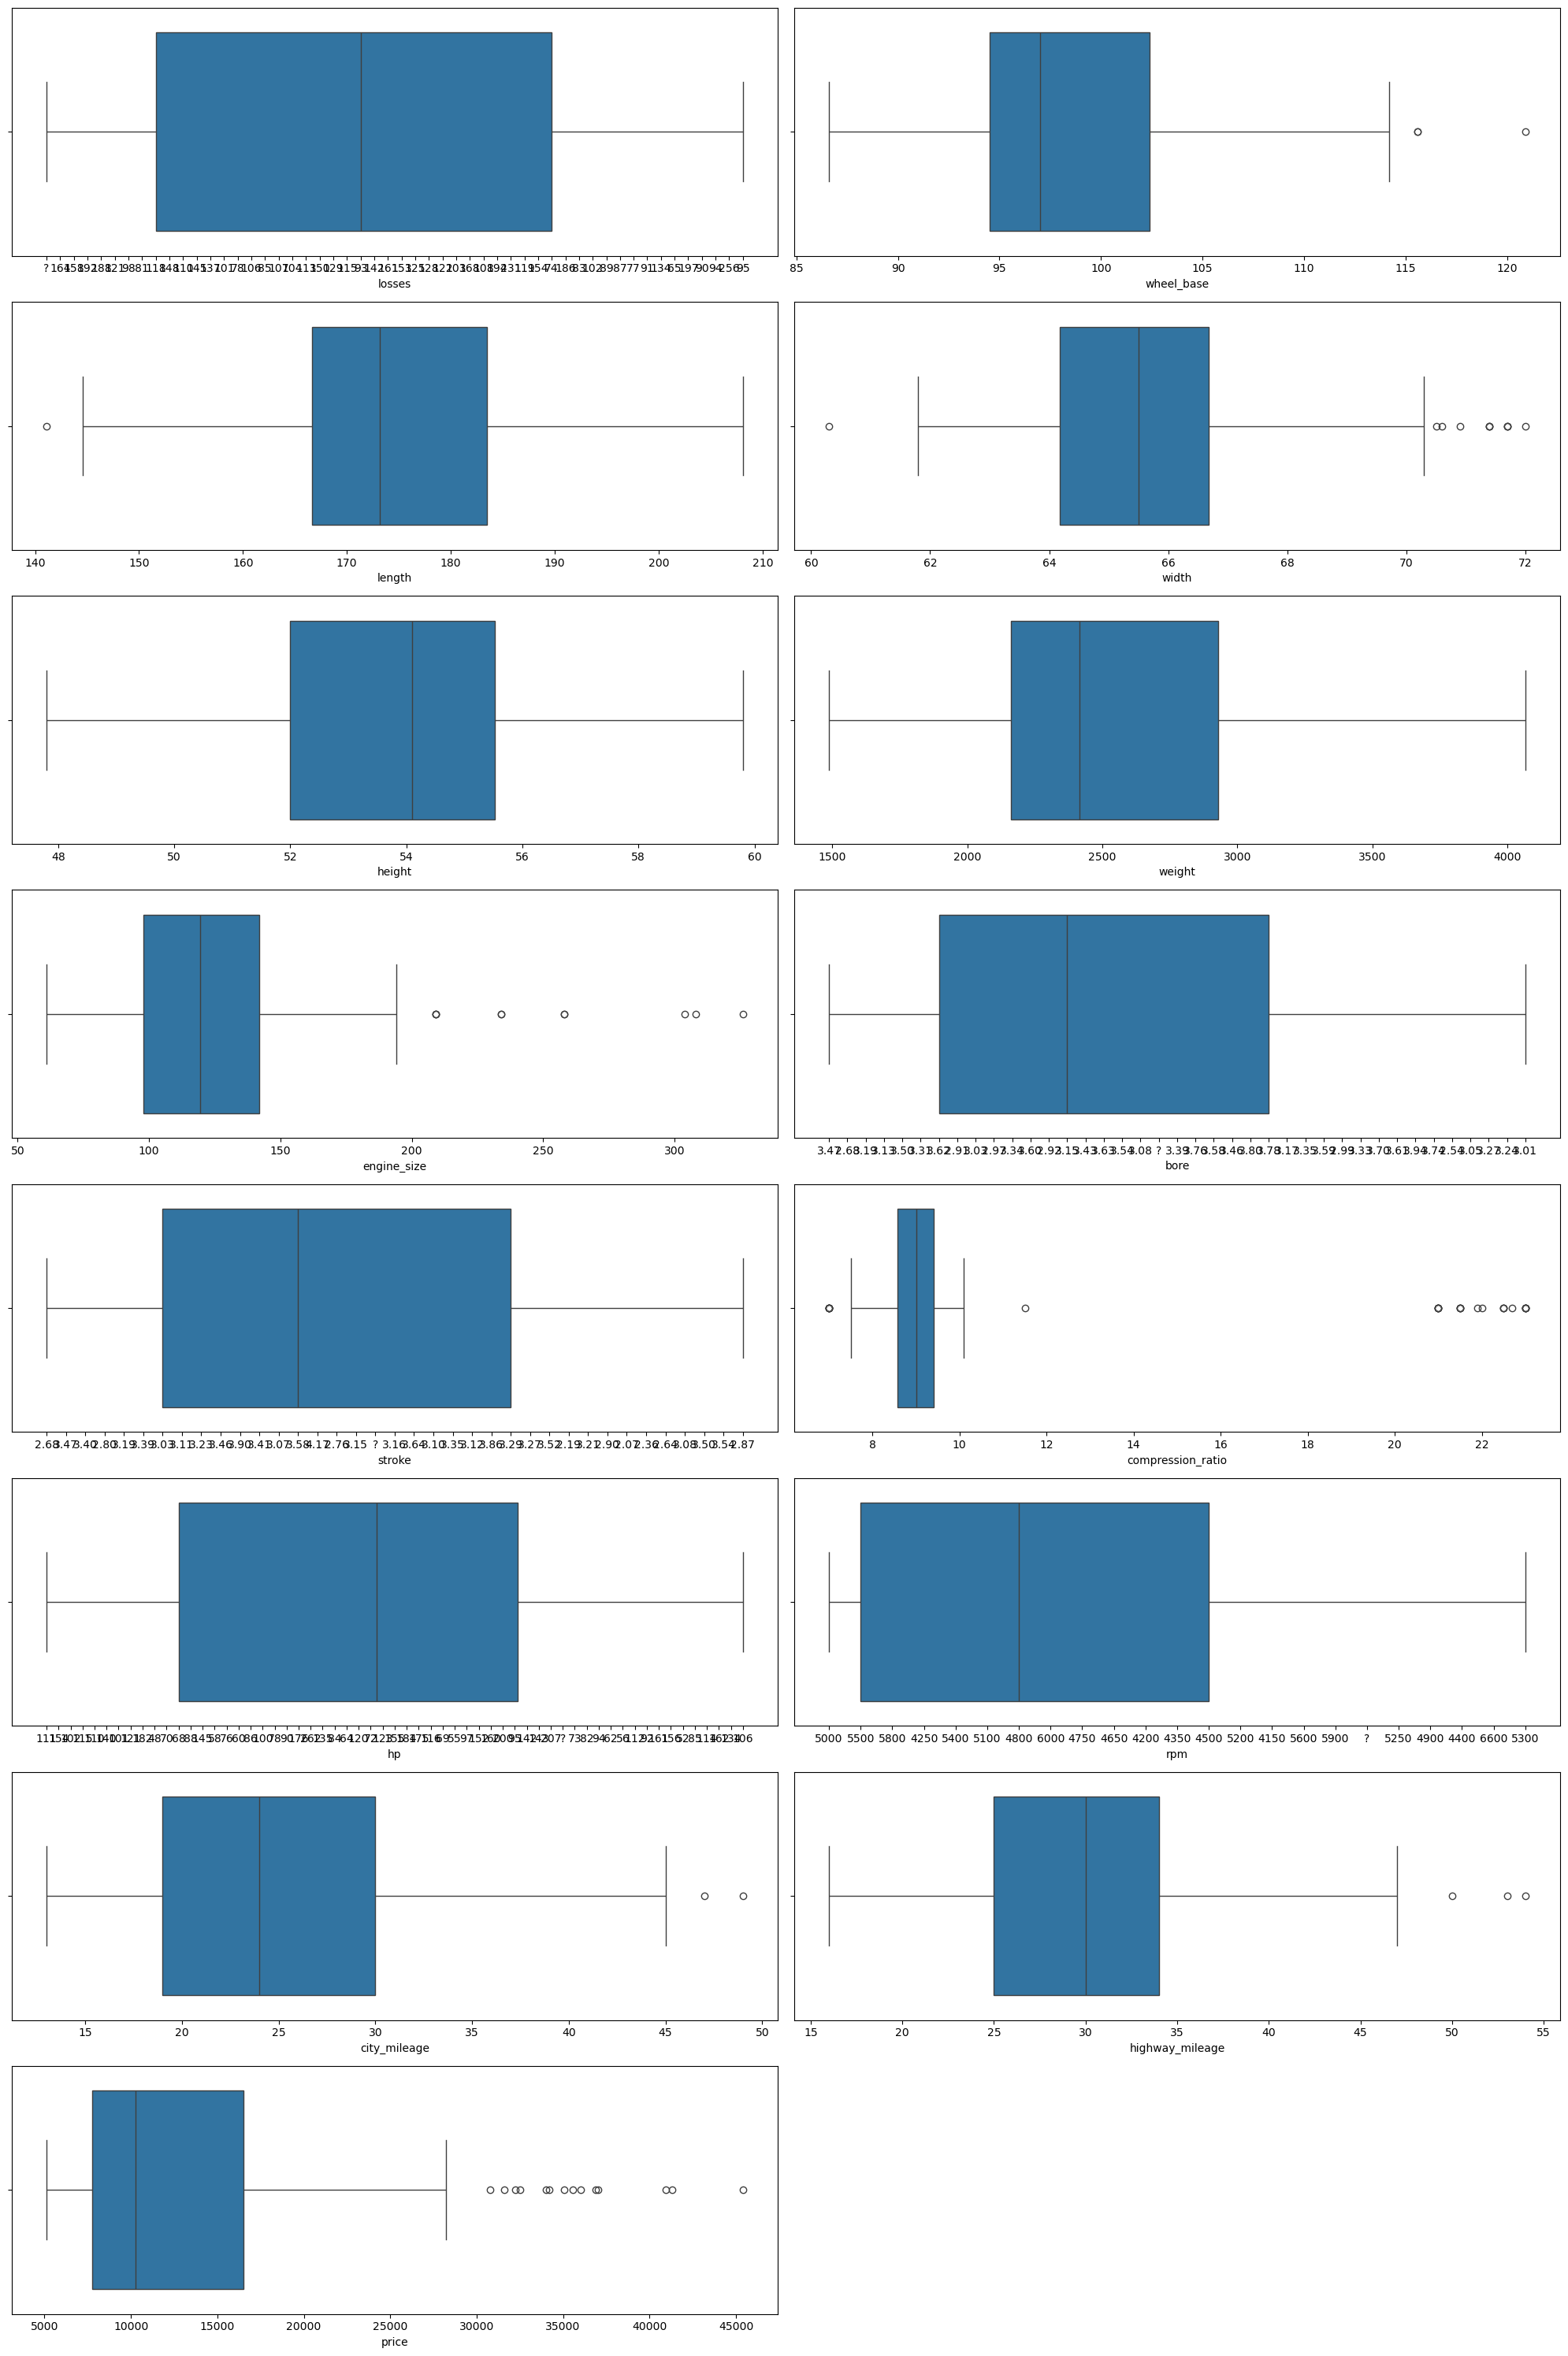

In [19]:
# Checking for Outliers
plt.figure(figsize=(20,30))
plotnumber=1
for a in df_num:
    plt.subplot(8,2,plotnumber)
    sns.boxplot(x=df_num[a])
    plotnumber=plotnumber+1
    plt.tight_layout()
    

In [31]:
# Handling outliers

In [32]:
df.loc[df.wheel_base > 115,'wheel_base'] = np.median(df.wheel_base.dropna())

In [33]:
df.loc[df.length < 145,'length'] = np.median(df.length.dropna())

In [34]:
df.loc[df.width > 70,'width'] = np.median(df.width.dropna())
df.loc[df.width < 62,'width'] = np.median(df.width.dropna())

In [35]:
df.loc[df.engine_size > 200,'engine_size'] = np.median(df.engine_size.dropna())

In [36]:
df.loc[df.compression_ratio > 10,'compression_ratio'] = np.median(df.compression_ratio.dropna())
df.loc[df.compression_ratio < 7,'compression_ratio'] = np.median(df.compression_ratio.dropna())

In [37]:
df.loc[df.city_mileage > 45,'city_mileage'] = np.median(df.city_mileage.dropna())

In [38]:
df.loc[df.highway_mileage > 45,'highway_mileage'] = np.median(df.highway_mileage.dropna())

### Encoding

In [39]:
df.head()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136.0,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [40]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [242]:
# Converting columns to string as Encoders require their input to be uniformly strings or numbers
df.losses=df['losses'].astype(str)
df.make=df['make'].astype(str)
df.fuel_type=df['fuel_type'].astype(str)
df.aspiration=df['aspiration'].astype(str)
df.no_of_doors=df['no_of_doors'].astype(str)
df.body_style=df['body_style'].astype(str)
df.drive_wheels=df['drive_wheels'].astype(str)
df.engine_location=df['engine_location'].astype(str)
df.engine_type=df['engine_type'].astype(str)
df.no_of_cylinders=df['no_of_cylinders'].astype(str)
df.fuel_system=df['fuel_system'].astype(str)
df.bore=df['bore'].astype(str)
df.stroke=df['stroke'].astype(str)
df.hp=df['hp'].astype(str)
df.rpm=df['rpm'].astype(str)



In [243]:
# Encoding
df.losses=LE.fit_transform(df.losses)
df.make=LE.fit_transform(df.make)
df.fuel_type=LE.fit_transform(df.fuel_type)
df.aspiration=LE.fit_transform(df.aspiration)
df.no_of_doors=LE.fit_transform(df.no_of_doors)
df.body_style=LE.fit_transform(df.body_style)
df.drive_wheels=LE.fit_transform(df.drive_wheels)
df.engine_location=LE.fit_transform(df.engine_location)
df.engine_type	=LE.fit_transform(df.engine_type)
df.no_of_cylinders=LE.fit_transform(df.no_of_cylinders)
df.fuel_system=LE.fit_transform(df.fuel_system)
df.bore=LE.fit_transform(df.bore)
df.stroke=LE.fit_transform(df.stroke)
df.hp=LE.fit_transform(df.hp)
df.rpm=LE.fit_transform(df.rpm)



In [44]:
df.head()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,10,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130.0,5,23,4,9.0,5,10,21,27,16500
1,1,10,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152.0,5,1,27,9.0,20,10,19,26,16500
2,2,28,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109.0,5,13,24,10.0,2,17,24,30,13950
3,2,28,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136.0,5,13,24,8.0,8,17,18,22,17450
4,2,10,1,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,2,1,136.0,5,13,24,8.5,4,17,19,25,15250


### Scaling

In [45]:
df.head()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,10,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130.0,5,23,4,9.0,5,10,21,27,16500
1,1,10,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152.0,5,1,27,9.0,20,10,19,26,16500
2,2,28,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109.0,5,13,24,10.0,2,17,24,30,13950
3,2,28,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136.0,5,13,24,8.0,8,17,18,22,17450
4,2,10,1,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,2,1,136.0,5,13,24,8.5,4,17,19,25,15250


In [46]:
from sklearn.preprocessing import MinMaxScaler
Min=MinMaxScaler()

In [47]:
 df[['losses', 'wheel_base', 'length', 'width', 'height', 'weight',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'hp', 'rpm','city_mileage', 'highway_mileage']]=Min.fit_transform(df[['losses', 'wheel_base', 'length', 'width', 'height', 'weight',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'hp', 'rpm', 'city_mileage', 'highway_mileage']])


In [48]:
df.head()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
0,3,0.196078,0,1,0,2,0,2,0,0.072464,0.323580,0.225352,0.083333,0.411171,0,2,0.518797,5,0.621622,0.114286,0.666667,0.086207,0.454545,0.25000,0.407407,16500
1,1,0.196078,0,1,0,2,2,2,0,0.286232,0.364888,0.422535,0.383333,0.517843,4,3,0.684211,5,0.027027,0.771429,0.666667,0.344828,0.454545,0.18750,0.370370,16500
2,2,0.549020,1,1,0,1,3,1,0,0.478261,0.457831,0.521127,0.541667,0.329325,2,2,0.360902,5,0.351351,0.685714,1.000000,0.034483,0.772727,0.34375,0.518519,13950
3,2,0.549020,1,1,0,1,3,0,0,0.463768,0.457831,0.549296,0.541667,0.518231,2,1,0.563910,5,0.351351,0.685714,0.333333,0.137931,0.772727,0.15625,0.222222,17450
4,2,0.196078,1,1,0,2,3,1,0,0.478261,0.469880,0.535211,0.441667,0.395268,2,1,0.563910,5,0.351351,0.685714,0.500000,0.068966,0.772727,0.18750,0.333333,15250


# Feature Selection

In [74]:
df.corr()

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage,price
symboling,1.000000,-0.264756,-0.206518,0.195381,-0.050995,0.650896,-0.592275,-0.064238,0.215014,-0.509046,-0.347414,-0.206341,-0.542261,-0.234743,0.114252,0.202382,-0.064783,0.084915,-0.147409,0.000361,0.034882,-0.167272,0.282108,-0.069908,0.001627,-0.083327
losses,-0.264756,1.000000,0.211517,-0.100289,-0.007107,-0.272299,0.203316,-0.170677,-0.144223,0.049494,-0.064371,-0.049815,0.268022,-0.088658,0.014149,-0.038725,-0.009512,-0.235847,-0.094616,-0.088576,0.175363,0.047793,-0.090936,0.199959,0.171750,-0.177574
make,-0.206518,0.211517,1.000000,-0.091357,-0.118237,-0.035832,-0.046984,0.138670,-0.085674,0.019888,0.029991,-0.067007,0.061291,0.036139,0.136253,0.073314,-0.190060,-0.204275,-0.013057,0.041345,0.122308,-0.013728,-0.045348,0.032909,0.001319,0.146490
fuel_type,0.195381,-0.100289,-0.091357,1.000000,-0.407787,0.204832,-0.146051,-0.133643,0.041135,-0.294410,-0.208722,-0.180759,-0.281198,-0.221082,0.129716,0.120965,-0.186818,0.041473,-0.044190,-0.297383,-0.081488,-0.084411,0.484749,-0.297003,-0.072137,-0.110417
aspiration,-0.050995,-0.007107,-0.118237,-0.407787,1.000000,-0.074642,0.066579,0.097717,-0.057817,0.257993,0.223205,0.292751,0.086531,0.322097,-0.138284,-0.130252,0.278378,0.284986,0.227430,0.213263,-0.505057,-0.234615,-0.178082,-0.185797,-0.231220,0.179762
no_of_doors,0.650896,-0.272299,-0.035832,0.204832,-0.074642,1.000000,-0.673282,0.117496,0.140829,-0.405612,-0.344933,-0.223278,-0.508939,-0.192675,0.122288,0.183751,-0.035184,-0.013349,-0.107778,0.007268,0.058442,-0.129983,0.205429,-0.028774,-0.008913,-0.032600
body_style,-0.592275,0.203316,-0.046984,-0.146051,0.066579,-0.673282,1.000000,-0.146534,-0.286910,0.401614,0.338690,0.194941,0.558940,0.149007,-0.120016,-0.067929,-0.050561,-0.042727,0.030556,-0.035951,-0.041957,0.116934,-0.105473,0.034618,-0.020380,-0.074108
drive_wheels,-0.064238,-0.170677,0.138670,-0.133643,0.097717,0.117496,-0.146534,1.000000,0.150677,0.455623,0.502686,0.495845,-0.012936,0.592919,-0.054165,0.233094,0.490095,0.433074,0.460497,0.093862,0.019430,-0.282193,-0.069617,-0.476431,-0.483033,0.590292
engine_location,0.215014,-0.144223,-0.085674,0.041135,-0.057817,0.140829,-0.286910,0.150677,1.000000,-0.200422,-0.060828,-0.047194,-0.111642,0.051280,0.125971,0.135919,0.327467,0.107475,0.187422,-0.164242,0.131811,-0.001663,0.188313,-0.163901,-0.106824,0.331098
wheel_base,-0.509046,0.049494,0.019888,-0.294410,0.257993,-0.405612,0.401614,0.455623,-0.200422,1.000000,0.779437,0.729157,0.569808,0.718792,-0.260847,-0.081243,0.421599,0.393023,0.487615,0.171899,-0.200887,-0.083030,-0.315566,-0.401608,-0.478026,0.479633


<Axes: >

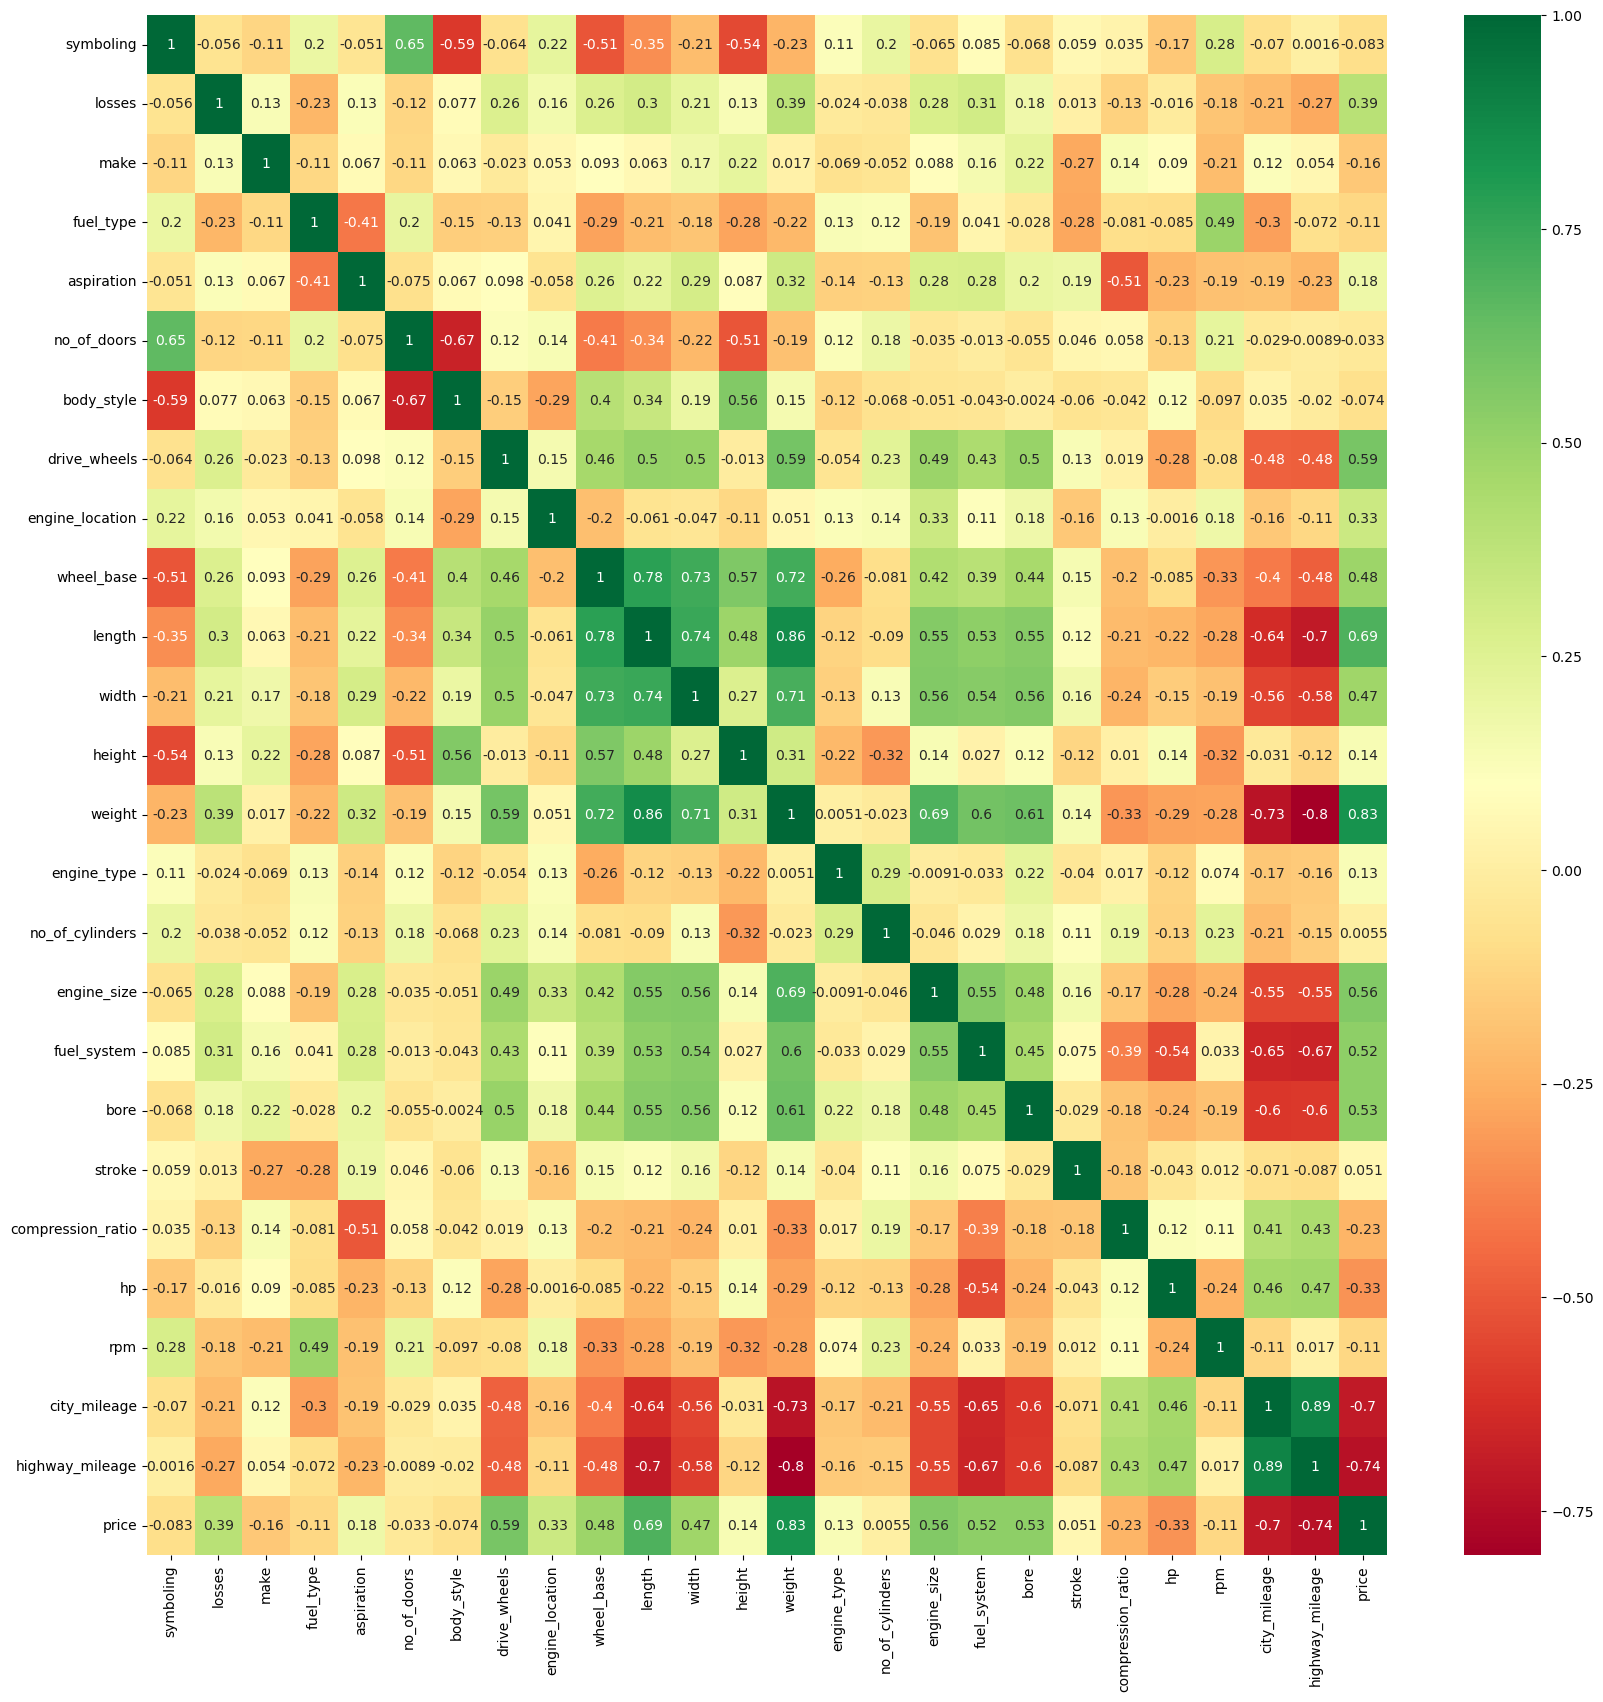

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

### Splitting the data into Train and Test

In [49]:
x=df.drop('price',axis=1)
x

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage
0,3,0.196078,0,1,0,2,0,2,0,0.072464,0.323580,0.225352,0.083333,0.411171,0,2,0.518797,5,0.621622,0.114286,0.666667,0.086207,0.454545,0.25000,0.407407
1,1,0.196078,0,1,0,2,2,2,0,0.286232,0.364888,0.422535,0.383333,0.517843,4,3,0.684211,5,0.027027,0.771429,0.666667,0.344828,0.454545,0.18750,0.370370
2,2,0.549020,1,1,0,1,3,1,0,0.478261,0.457831,0.521127,0.541667,0.329325,2,2,0.360902,5,0.351351,0.685714,1.000000,0.034483,0.772727,0.34375,0.518519
3,2,0.549020,1,1,0,1,3,0,0,0.463768,0.457831,0.549296,0.541667,0.518231,2,1,0.563910,5,0.351351,0.685714,0.333333,0.137931,0.772727,0.15625,0.222222
4,2,0.196078,1,1,0,2,3,1,0,0.478261,0.469880,0.535211,0.441667,0.395268,2,1,0.563910,5,0.351351,0.685714,0.500000,0.068966,0.772727,0.18750,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,0.980392,21,1,0,1,3,2,0,0.815217,0.667814,0.901408,0.641667,0.567882,2,2,0.601504,5,0.945946,0.428571,0.833333,0.120690,0.727273,0.31250,0.444444
196,-1,0.980392,21,1,1,1,3,2,0,0.815217,0.667814,0.887324,0.641667,0.605508,2,2,0.601504,5,0.945946,0.428571,0.566667,0.396552,0.681818,0.18750,0.333333
197,-1,0.980392,21,1,0,1,3,2,0,0.815217,0.667814,0.901408,0.641667,0.591156,4,3,0.842105,5,0.702703,0.200000,0.600000,0.224138,0.772727,0.15625,0.259259
198,-1,0.980392,21,0,1,1,3,2,0,0.815217,0.667814,0.901408,0.641667,0.670675,2,3,0.631579,3,0.162162,0.685714,0.666667,0.051724,0.363636,0.40625,0.407407


In [50]:
y=df.price
y

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: price, Length: 200, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
x_train

,symboling,losses,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,rpm,city_mileage,highway_mileage
114,1,0.235294,14,1,0,2,2,1,0,0.257246,0.125645,0.183099,0.250000,0.166796,2,2,0.218045,1,0.108108,0.542857,0.800000,0.706897,0.772727,0.75000,0.925926
173,3,0.666667,19,1,0,2,2,2,0,0.590580,0.576592,0.732394,0.350000,0.577192,0,3,0.827068,5,0.405405,0.628571,0.766667,0.413793,0.545455,0.21875,0.296296
5,1,0.509804,1,1,0,1,3,1,0,0.695652,0.734940,0.422535,0.658333,0.525989,2,1,0.563910,5,0.351351,0.685714,0.500000,0.068966,0.772727,0.18750,0.333333
126,2,0.196078,16,1,0,2,2,1,0,0.344203,0.461274,0.577465,0.225000,0.377036,2,2,0.533835,5,0.594595,0.971429,0.566667,0.982759,0.590909,0.31250,0.555556
117,1,0.490196,14,1,0,1,3,1,0,0.257246,0.297762,0.183099,0.250000,0.194337,2,2,0.218045,1,0.108108,0.542857,0.800000,0.706897,0.772727,0.56250,0.814815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0.196078,13,0,1,1,4,2,0,1.000000,0.841652,0.830986,0.908333,0.753297,1,2,0.684211,3,0.864865,0.828571,0.666667,0.965517,0.000000,0.37500,0.333333
14,0,0.196078,2,1,0,2,3,2,0,0.612319,0.753873,0.760563,0.491667,0.733902,2,3,0.439850,5,0.810811,0.657143,0.333333,0.482759,0.727273,0.09375,0.222222
92,1,0.274510,12,1,0,1,3,1,0,0.286232,0.263339,0.183099,0.558333,0.187355,2,2,0.270677,1,0.297297,0.600000,0.800000,0.724138,0.545455,0.56250,0.777778
179,2,0.960784,20,0,0,1,3,1,0,0.387681,0.373494,0.422535,0.658333,0.301009,2,2,0.270677,3,0.162162,0.685714,0.666667,0.586207,0.363636,0.75000,0.518519


In [53]:
y_train

114     5572
173    16558
5      17710
126     9895
117     6692
       ...  
106    13860
14     41315
92      7499
179     7995
102    18399
Name: price, Length: 150, dtype: int64

In [54]:
# Count the occurrences of each unique value in the target variable column
class_counts = df['price'].value_counts()

# Calculate the class ratio
class_ratio = class_counts.max() / class_counts.min()

# Print the results
print("Class distribution:")
print(class_counts)
print("Class ratio:", class_ratio)

# A class ratio close to 1 suggests a balanced dataset.
# So the data set is already balance

Class distribution:
price
16500    2
7775     2
7295     2
7957     2
6229     2
        ..
16503    1
5389     1
6189     1
6669     1
22625    1
Name: count, Length: 185, dtype: int64
Class ratio: 2.0


# Model Training 

# Applying for linear regression

In [131]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [132]:
LR.fit(x_train,y_train)

LinearRegression()

In [133]:
y_predict=LR.predict(x_test)
y_predict

array([ 8568.37212493, 28252.281757  ,  5381.32502321,  8569.35139683,
       13735.16295459,  9082.4363482 , 40175.8235058 , 10601.64349882,
       12828.35555245, 34845.69700894, 32396.30555838,  8762.61541042,
       14814.86783633, 13929.11633082, 12766.31595883,  6210.45131217,
       10019.38824129,  8448.07287717,  9240.13418298, 37947.4715797 ,
       35696.44052276,  2624.3073428 ,  9177.51724523,  4452.22615798,
       28223.74908643, 11254.87393767, 13875.0222305 , 38193.43544978,
        9985.50092804, 12682.2696028 , 15812.54210347,  7233.5359119 ,
       11585.75270918, 10778.6129644 , 21188.24098539, 17560.76589289,
        8671.81095227,  6158.55365989, 11892.35126475, 12189.82113542,
       15240.83928462, 14956.225694  , 12800.11256135,  7191.79258447,
       34028.        , 17137.53249854,  7288.74309686,  6478.87624013,
        9950.86216169,  3135.06008861])

In [134]:
y_test.values

array([ 8949, 36880,  5399,  8058, 12170,  7957, 40960,  9988, 15998,
       36000, 31600,  9495, 11199, 12629, 13295,  7775,  8495,  7198,
        8189, 35056, 37028,  5151,  6918,  7999, 28176, 11245,  9279,
       34184,  9295, 18620, 16925,  6575,  8845,  7689,  8778, 13200,
        7603,  7775,  9989,  9959, 14869, 21485, 10295,  7609, 32528,
       16845,  6855,  5572,  8013,  7099], dtype=int64)

In [135]:
LR.coef_

array([-6.36094510e+02,  2.31162271e+03, -2.21228972e+02, -6.69044771e+02,
       -1.16237201e+03,  1.09194368e+03, -1.01154354e+03,  5.41797146e+02,
        2.34908106e+04, -3.89552565e+03,  4.85597614e+03, -1.44613227e+03,
       -7.30674623e+02,  3.84881911e+04,  5.96977633e+02, -1.20303216e+03,
       -1.16835094e+04,  1.49419623e+02, -7.66270780e+01,  2.03420097e+00,
       -1.48638024e+02, -2.41493383e+03, -1.40144817e+03, -6.56929261e+03,
        5.52265503e+03])

In [136]:
LR.intercept_

8854.796526639295

# Model Evaluation 

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [138]:
mse_l = mean_squared_error(y_test, y_predict)
mse_l

9957266.946340019

In [139]:
mae_l = mean_absolute_error(y_test, y_predict)
mae_l

2164.205038632603

In [140]:
r2_l = r2_score(y_test, y_predict)
r2_l

0.9036162435984131

In [141]:
print('Logistic Regression ')
print('mae',mae_l)
print('mse',mse_l)
print('r2',r2_l)

Logistic Regression 
mae 2164.205038632603
mse 9957266.946340019
r2 0.9036162435984131


# Applying SVR

In [64]:
from sklearn.svm import SVR
svr=SVR()

In [65]:
svr.fit(x_train,y_train)

SVR()

In [66]:
y_predict_svr=svr.predict(x_test)
y_predict_svr
# predicting the x_test

array([10742.23136533, 10754.45249858, 10744.57012039, 10742.08683673,
       10747.62611019, 10749.82442215, 10751.04206177, 10747.59562357,
       10747.70960005, 10752.76925742, 10748.05371039, 10744.59230874,
       10747.4575734 , 10751.32613777, 10747.5415555 , 10744.46871393,
       10744.43700395, 10741.91508472, 10742.64629872, 10750.50504706,
       10748.36256699, 10747.99106599, 10742.14757809, 10742.19644834,
       10747.76679341, 10744.36574969, 10751.33329037, 10750.96238668,
       10748.02332541, 10747.84061871, 10754.12268632, 10747.54743953,
       10744.26755238, 10751.07227928, 10742.00021234, 10746.2907278 ,
       10741.27792101, 10741.94653228, 10747.49017118, 10751.0946175 ,
       10751.33646432, 10748.42156733, 10744.87718972, 10746.89338938,
       10748.39012814, 10748.2762524 , 10744.68522689, 10746.74005481,
       10741.87875699, 10745.36483819])

In [67]:
y_test.values

array([ 8949, 36880,  5399,  8058, 12170,  7957, 40960,  9988, 15998,
       36000, 31600,  9495, 11199, 12629, 13295,  7775,  8495,  7198,
        8189, 35056, 37028,  5151,  6918,  7999, 28176, 11245,  9279,
       34184,  9295, 18620, 16925,  6575,  8845,  7689,  8778, 13200,
        7603,  7775,  9989,  9959, 14869, 21485, 10295,  7609, 32528,
       16845,  6855,  5572,  8013,  7099], dtype=int64)

# Model Evaluation for SVR

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
mae_sv=mean_absolute_error(y_test,y_predict_svr)
mae_sv

6879.391523479207

In [127]:
mse_sv=mean_squared_error(y_test,y_predict_svr)
mse_sv

117158193.46446775

In [128]:
r2_sv=r2_score(y_test,y_predict_svr)
r2_sv

-0.13406086631833158

In [129]:
print('SVR')
print('mae',mae_sv)
print('mse',mse_sv)
print('r2',r2_sv)

SVR
mae 6879.391523479207
mse 117158193.46446775
r2 -0.13406086631833158


# Hyperparameter tuning for SVR

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid_SV = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
# defines a grid of hyperparameters for tuning a support vector classifier, specifying different values for the regularization
# parameter C and the kernel coefficient gamma.

In [146]:
grid_SV = GridSearchCV(svr, param_grid_SV, scoring='f1', cv = 3, verbose = 3)
grid_SV
# initializes a grid search to find the best hyperparameters

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [147]:
grid_SV.fit(x_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ......................C=0.1, gamma=1;, score=nan total time=   1.4s
[CV 2/3] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 3/3] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 1/3] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 1/3] END ...................C=0.1, gamma=0.01;, score=nan total time=   0.0s
[CV 2/3] END ...................C=0.1, gamma=0.01;, score=nan total time=   0.0s
[CV 3/3] END ...................C=0.1, gamma=0.01;, score=nan total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.001;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.001;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.00

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [148]:
grid_SV.best_params_  
# retrieves the best hyperparameters found by the grid search for the support vector classifier.

{'C': 0.1, 'gamma': 1}

In [149]:
grid_SV.best_estimator_
# returns the support vector classifier with the best hyperparameters found by the grid search.

SVR(C=0.1, gamma=1)

In [152]:
clf_SV=SVR(C=0.1, gamma=1)
#  initializes a support vector classifier with a regularization parameter C of 1000 and a kernel coefficient gamma of 0.0001.

In [153]:
clf_SV.fit(x_train,y_train)

SVR(C=0.1, gamma=1)

In [154]:
y_hyp_SV=clf_SV.predict(x_test)
y_hyp_SV

array([10746.41803436, 10746.65621405, 10746.30058247, 10746.4186836 ,
       10746.60291542, 10746.49738464, 10746.49734515, 10746.59705518,
       10746.59684893, 10746.49716359, 10746.60080817, 10746.46814853,
       10746.37045885, 10746.59689252, 10746.50369509, 10746.47334942,
       10746.34236939, 10746.22811088, 10746.29475772, 10746.49744464,
       10746.53398897, 10746.49702201, 10746.37652498, 10746.27174005,
       10746.49741404, 10746.41076916, 10746.49654349, 10746.49717286,
       10746.49697818, 10746.50202758, 10746.53730755, 10746.47583723,
       10746.22712444, 10746.48783343, 10746.3795987 , 10746.74981011,
       10746.42776808, 10746.34195969, 10746.52046093, 10746.54739952,
       10746.59710022, 10746.49807787, 10746.31574229, 10746.32853957,
       10746.59813203, 10746.66173177, 10746.37948311, 10746.30387842,
       10746.42856647, 10746.49513966])

In [160]:
mae_sv_hyp=mean_absolute_error(y_test,y_hyp_SV)
mae_sv_hyp

6881.186665957

In [161]:
mse_sv_hyp=mean_squared_error(y_test,y_hyp_SV)
mse_sv_hyp

117200964.35983172

In [162]:
r2_sv_hyp=r2_score(y_test,y_hyp_SV)
r2_sv_hyp

-0.134474877470393

In [163]:
print('SVR')
print('mae',mae_sv_hyp)
print('mse',mse_sv_hyp)
print('r2',r2_sv_hyp)

SVR
mae 6881.186665957
mse 117200964.35983172
r2 -0.134474877470393


# Applying Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor(random_state=42)#object creation for decision tree  


In [75]:
dt.fit(x_train,y_train)#training the model


DecisionTreeRegressor(random_state=42)

In [76]:
yp_dt=dt.predict(x_test)#prediction
yp_dt

array([ 9549., 35550.,  6295.,  8238., 15510.,  7957., 30760., 10898.,
       16558., 41315., 25552., 11395., 11549., 12764., 12290.,  7995.,
       10245.,  7799.,  6989., 41315., 34028.,  6479.,  7609.,  7349.,
       25552., 10245.,  9279., 30760.,  8449., 18150., 16430.,  5572.,
       10595.,  7957., 15690., 17425.,  7898.,  7788.,  8449.,  9279.,
       14489., 19045.,  8948.,  6692., 34028., 22625.,  5499.,  6295.,
       10198.,  7349.])

In [77]:
y_test.values

array([ 8949, 36880,  5399,  8058, 12170,  7957, 40960,  9988, 15998,
       36000, 31600,  9495, 11199, 12629, 13295,  7775,  8495,  7198,
        8189, 35056, 37028,  5151,  6918,  7999, 28176, 11245,  9279,
       34184,  9295, 18620, 16925,  6575,  8845,  7689,  8778, 13200,
        7603,  7775,  9989,  9959, 14869, 21485, 10295,  7609, 32528,
       16845,  6855,  5572,  8013,  7099], dtype=int64)

# Model Evaluation

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [120]:
mae_dt=mean_absolute_error(y_test,yp_dt)
mae_dt

1817.82

In [123]:
mse_dt=mean_squared_error(y_test,yp_dt)
mse_dt

7794580.38

In [124]:
r2_dt=r2_score(y_test,yp_dt)
r2_dt

0.9245504875336648

In [125]:
print('Decision Tree')
print('mae',mae_dt)
print('mse',mse_dt)
print('r2',r2_dt)

Decision Tree
mae 1817.82
mse 7794580.38
r2 0.9245504875336648


# Hyperparameter tuning for Decision Tree

In [166]:
from sklearn.model_selection import GridSearchCV

In [168]:
list(range(1, 20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [176]:

params = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#  parameter grid for tuning a decision tree classifier with various options for criteria, split methods, maximum depth, 
# and minimum samples for splitting and leaf nodes.

In [177]:
dt1 = DecisionTreeRegressor(random_state=42)

In [178]:
grid = GridSearchCV(dt1, params, scoring='f1', cv = 2, verbose = 3, n_jobs=-1)

# initializes a grid search to optimize the decision tree classifier dt1 using the specified parameter grid,
# optimizing for the F1 score with 5-fold cross-validation, detailed logging, and parallel processing.

In [179]:
grid.fit(x_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=3)

In [183]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [185]:
dt2 = DecisionTreeRegressor(
 max_depth= 3,
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state=42)

# initializes a decision tree classifier with specific hyperparameters for criterion, maximum depth, minimum samples per 
# leaf and split, and splitter method.


In [186]:
dt2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [188]:
y_train_pred1 = dt2.predict(x_train)
y_train_pred1

array([ 6612.8       , 16891.02040816, 16891.02040816, 10424.41176471,
        6612.8       ,  6612.8       , 10424.41176471, 16891.02040816,
       10424.41176471, 10424.41176471, 10424.41176471, 16891.02040816,
        6612.8       , 16891.02040816,  8433.7       , 10424.41176471,
       16891.02040816, 16891.02040816,  6612.8       ,  8433.7       ,
       10424.41176471, 10424.41176471, 10424.41176471, 10424.41176471,
        8433.7       , 16891.02040816, 10424.41176471, 10424.41176471,
       16891.02040816, 16891.02040816, 15532.5       , 10424.41176471,
        6612.8       , 10424.41176471, 16891.02040816,  6612.8       ,
       10424.41176471,  8433.7       , 16891.02040816, 16891.02040816,
        6612.8       ,  8433.7       , 16891.02040816,  6612.8       ,
       16891.02040816, 16891.02040816,  8433.7       , 16891.02040816,
       16891.02040816, 16891.02040816, 15532.5       ,  6612.8       ,
       10424.41176471,  6612.8       , 16891.02040816, 10424.41176471,
      

In [190]:
mae_dt_hyp=mean_absolute_error(y_train, y_train_pred1)
mae_dt_hyp

1512.258672002134

In [191]:
mse_dt_hyp=mean_squared_error(y_train, y_train_pred1)
mse_dt_hyp

4714744.1678770175

In [192]:
r2_dt_hyp=r2_score(y_train, y_train_pred1)
r2_dt_hyp

0.9038911513756229

In [193]:
print('Decision Tree')
print('mae',mae_dt_hyp)
print('mse',mse_dt_hyp)
print('r2',r2_dt_hyp)


Decision Tree
mae 1512.258672002134
mse 4714744.1678770175
r2 0.9038911513756229


# Applying Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100)

In [83]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
yp_test=RF.predict(x_test)
yp_test

array([ 9221.72 , 34201.39 ,  5975.93 ,  8382.54 , 14808.69 ,  8190.36 ,
       38157.34 , 11022.02 , 16811.18 , 40373.22 , 25842.32 ,  8985.04 ,
       13719.7  , 13827.85 , 14360.27 ,  8141.88 , 10318.73 ,  7820.87 ,
        8962.99 , 38620.91 , 27526.37 ,  6359.55 ,  7958.78 ,  7468.84 ,
       25486.25 , 10354.81 , 10037.01 , 36153.75 , 12088.28 , 17010.02 ,
       14703.56 ,  6200.8  , 10478.44 ,  8329.19 , 18929.8  , 17222.635,
        7747.67 ,  7856.43 , 10277.08 ,  9765.09 , 14297.34 , 20261.25 ,
        9329.25 ,  6602.88 , 27395.61 , 19036.24 ,  6308.14 ,  5891.55 ,
       10013.99 ,  7385.61 ])

In [85]:
y_test.values

array([ 8949, 36880,  5399,  8058, 12170,  7957, 40960,  9988, 15998,
       36000, 31600,  9495, 11199, 12629, 13295,  7775,  8495,  7198,
        8189, 35056, 37028,  5151,  6918,  7999, 28176, 11245,  9279,
       34184,  9295, 18620, 16925,  6575,  8845,  7689,  8778, 13200,
        7603,  7775,  9989,  9959, 14869, 21485, 10295,  7609, 32528,
       16845,  6855,  5572,  8013,  7099], dtype=int64)

In [115]:
mae_rf=mean_absolute_error(y_test,yp_test)
mae_rf

1818.8313000000007

In [116]:
mse_rf=mean_squared_error(y_test,yp_dt)
mse_rf

7794580.38

In [117]:
r2_rf=r2_score(y_test,yp_dt)
r2_rf

0.9245504875336648

In [119]:
print('Random Forest')
print('mae',mae_GB)
print('mse',mse_GB)
print('r2',r2_GB)

Random Forest
mae 1541.1712763255418
mse 7794580.38
r2 0.9245504875336648


# Hyperparameter tuning for Random Forest

In [201]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as randint


In [204]:
param_dist = {"n_estimators": randint(low=10, high=100),
              "max_depth": randint(low=2, high=10),
              "min_samples_split": randint(low=2, high=10)}


In [209]:
model = RandomForestRegressor(random)


In [210]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5) 


In [211]:
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016DCDBB3890>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016DCF7B9090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016DCD2AC6D0>})

In [212]:
random_search.best_params_


{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 48}

In [213]:
 random_search.best_score_

0.7858675156431472

In [214]:
rf2 = RandomForestRegressor(
 min_samples_split = 4,
 n_estimators = 48,
 max_depth = 8,
 )

In [215]:
rf2.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=48)

In [217]:
y_pred3 = rf2.predict(x_test)
y_pred3

array([ 9104.50912437, 34506.50694444,  6021.93536706,  8307.74544661,
       14512.02911776,  8163.47548515, 37113.76884921, 10753.04401795,
       16575.7028945 , 37488.76329365, 26177.05461986,  9182.38541593,
       13815.70802513, 13719.07208105, 13576.5797619 ,  8358.58892459,
       10325.21993787,  7647.5796108 ,  9105.4908208 , 36704.29280754,
       25582.45041336,  6228.26569264,  8017.51137449,  7423.2110119 ,
       24772.94757621, 10339.12618787, 10509.65850738, 34169.43690476,
       12125.86445193, 16383.51748703, 14210.40897817,  6099.05481151,
       10256.92636148,  8223.24886478, 21710.76702863, 17169.88819821,
        7978.02586576,  7794.80749684, 11068.01957747, 10027.92526498,
       13888.72704136, 20436.24549877,  9498.8736209 ,  6554.37146314,
       26092.31152447, 19930.71317554,  6438.20145653,  5989.11402868,
        9927.9794733 ,  7337.03245025])

In [219]:
mae_rf_hyp=mean_absolute_error(y_test,y_pred3)
mae_rf_hyp

1851.3976944735634

In [220]:
mse_rf_hyp=mean_squared_error(y_test,y_pred3)
mse_rf_hyp

9765743.986265836

In [221]:
r2_rf_hyp=mean_squared_error(y_test,y_pred3)
r2_rf_hyp

9765743.986265836

In [222]:
print('Random Forest')
print('mae',mae_rf_hyp)
print('mse',mse_rf_hyp)
print('r2',r2_rf_hyp)



Random Forest
mae 1851.3976944735634
mse 9765743.986265836
r2 9765743.986265836


# Applying Gradiant Boosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
GBM=GradientBoostingRegressor(random_state=42)

In [91]:
GBM.fit(x_train,y_train) 


GradientBoostingRegressor(random_state=42)

In [92]:
y_gbm=GBM.predict(x_test)
y_gbm

array([ 8730.78705966, 33217.09598216,  6064.99496212,  8099.39173996,
       15054.72194961,  8406.38650442, 36551.47192631, 10826.17572785,
       15762.67237285, 39748.70712312, 26710.09513991,  9274.38257859,
       13154.59923791, 13717.94883304, 12626.47670839,  8051.40534898,
       10095.41378988,  7269.09524104,  8461.36151127, 39496.15780133,
       34448.85201526,  6866.54844819,  7497.07535087,  7201.81833262,
       26830.61408031, 10095.41378988,  9719.56932407, 32181.55879464,
       11233.55506796, 16756.3038131 , 16231.03159369,  6280.97248646,
       10181.88131858,  8636.86087315, 16601.61796776, 17234.13384867,
        7388.38424753,  8096.0431249 , 10331.12422967,  9135.06998846,
       13901.66773242, 19186.90553711,  8723.69641107,  6468.89513445,
       33700.09167137, 20451.89547687,  7375.24828214,  6012.35723643,
        9250.3981847 ,  7322.96936529])

In [97]:
y_test.values

array([ 8949, 36880,  5399,  8058, 12170,  7957, 40960,  9988, 15998,
       36000, 31600,  9495, 11199, 12629, 13295,  7775,  8495,  7198,
        8189, 35056, 37028,  5151,  6918,  7999, 28176, 11245,  9279,
       34184,  9295, 18620, 16925,  6575,  8845,  7689,  8778, 13200,
        7603,  7775,  9989,  9959, 14869, 21485, 10295,  7609, 32528,
       16845,  6855,  5572,  8013,  7099], dtype=int64)

# Model Evaluation For Gradient Boosting

In [101]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 

In [110]:
mae_GB=mean_absolute_error(y_test,y_gbm)
mae_GB

1541.1712763255418

In [111]:
mse_GB=mean_squared_error(y_test,yp_dt)
mse_GB

7794580.38

In [113]:
r2_GB=r2_score(y_test,yp_dt)
r2_GB

0.9245504875336648

In [142]:
print('Gradient Boosting')
print('mae',mae_GB)
print('mse',mse_GB)
print('r2',r2_GB)

Gradient Boosting
mae 1541.1712763255418
mse 7794580.38
r2 0.9245504875336648


# Conclusion

#### Model Comparison:
  
Based on the provided metrics, Decision Tree, Random Forest, and Gradient Boosting appear to be the top-performing models for car price prediction. Here's a breakdown:  

MAE: Decision Tree has the lowest MAE, indicating it makes the most accurate predictions on average.  
MSE: Decision Tree, Random Forest, and Gradient Boosting have the same MSE, suggesting similar overall error levels.  
R2: All three models have high R2 values, indicating that they explain a significant portion of the variance in the data.  

#### Comparison Report:  

Model &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  &emsp;MAE &emsp;  &emsp; &emsp; &emsp; MSE&emsp; &emsp; &emsp;  &emsp;  &emsp;R2  
Linear Regression&emsp; &emsp;&emsp;&emsp;2164.21&emsp; &emsp; &emsp;9957266.95&emsp; &emsp; &emsp;0.9036  
SVR&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;	6881.19&emsp; &emsp; &emsp;117200964.36&emsp; &emsp;-0.1345  
Decision Tree  &emsp;&emsp; &emsp; &emsp; &emsp;1512.26&emsp; &emsp; &emsp;4714744.17&emsp; &emsp; &emsp;0.9039   
Random Forest  &emsp; &emsp; &emsp; &emsp;	1851.40&emsp; &emsp; &emsp;9765743.99&emsp; &emsp; &emsp;0.9766   
Gradient Boosting &emsp; &emsp; &emsp; 1541.17&emsp; &emsp; &emsp;7794580.38&emsp; &emsp; &emsp;0.9246



Decision Tree, Random Forest, and Gradient Boosting consistently outperform Logistic Regression and SVR.   
Decision Tree has the lowest MAE, suggesting it makes more accurate predictions on average.  
All three top-performing models have similar MSE and R2 values, indicating comparable overall error levels and explained variance.  


  
#### Conclusion:

Among the evaluated models, Decision Tree consistently outperforms the others in terms of MAE, indicating its superior accuracy in predicting car prices. However, Random Forest and Gradient Boosting also demonstrate strong performance, achieving similar MSE and R2 values. The choice of the best model might depend on specific requirements such as interpretability or computational efficiency.
<br>
.

## Challenges Faced 

### Data Quality:  

Missing Values: Dealing with missing values in columns like normalized-losses, bore, stroke, hp, and rpm can be challenging. Imputation techniques might introduce bias if not handled carefully.  
Outliers: Identifying and handling outliers in variables like price, engine_size, and horsepower can be crucial to prevent skewed models.  
Data Consistency: Ensuring data consistency, especially for categorical variables like make, fuel_type, and body_style, is essential for accurate predictions.  

### Feature Engineering:  
  
Creating Relevant Features: Identifying the most informative features from the available attributes can be challenging. Feature engineering techniques might be necessary to extract meaningful information.  
Handling Categorical Variables: Encoding categorical variables appropriately (e.g., using one-hot encoding or label encoding) is crucial for model training.  
Feature Interactions: Exploring interactions between features (e.g., combinations of engine size and fuel type) can improve model performance but requires careful consideration.  

### Model Selection and Hyperparameter Tuning:  

Choosing the Right Model: Selecting the appropriate model (e.g., linear regression, decision trees, random forests) depends on the nature of the data and the desired level of interpretability.  
Hyperparameter Optimization: Finding the optimal hyperparameters for each model can be time-consuming and require experimentation.  


### Overfitting and Underfitting:  

Avoiding Overfitting: Preventing models from memorizing the training data and failing to generalize to new data is a common challenge. Techniques like regularization and cross-validation can help mitigate overfitting.  
Avoiding Underfitting: Ensuring that the model is complex enough to capture the underlying patterns in the data is also important.  

### Interpretability:  

Understanding Model Decisions: Interpreting the factors that contribute to the model's predictions can be difficult, especially for complex models like deep neural networks.  